# Install neccessary libraries

In [39]:
pip install lightgbm shap pandas matplotlib seaborn scipy plotly sentence-transformers

  Using cached sentence_transformers-5.2.0-py3-none-any.whl.metadata (16 kB)
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.9.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached huggingface_hub-1.2.3-py3-none-any.whl.metadata (13 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached typer_slim-0.21.0-py3-none-any.whl.metadata (16 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached anyio-4.12.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached click-8.3.1-py3-n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import json
from sentence_transformers import SentenceTransformer

/home/srvazquez/workspace/MasterIA/HerramientasComputacionales/KaggleDatasetFlorida/KaggleFloridaDataset/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

# Mostrar todas las filas y columnas
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

# Mostrar el contenido completo de cada columna
pd.set_option('display.max_colwidth', 100)

# Ampliar el ancho del display para evitar saltos de línea raros
pd.set_option('display.width', 100)


# Get datasets

In [3]:
df_train_split = pd.read_csv('data/train_split.csv')
df_test_split = pd.read_csv('data/test_split.csv')

/tmp/ipykernel_26293/151384524.py:1: DtypeWarning: Columns (19,24,52,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_split = pd.read_csv('data/train_split.csv')
/tmp/ipykernel_26293/151384524.py:2: DtypeWarning: Columns (52,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_split = pd.read_csv('data/test_split.csv')


## Explore datasets

In [4]:
print(f"Shape train_df: {df_train_split.shape}")
print(f"Shape test_df: {df_test_split.shape}")


Shape train_df: (110000, 70)
Shape test_df: (39867, 70)


In [5]:
df_train_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  110000 non-null  int64  
 1   ciudad                              110000 non-null  object 
 2   estado                              110000 non-null  object 
 3   estado_propiedad                    110000 non-null  object 
 4   dormitorios                         102884 non-null  float64
 5   banos                               106172 non-null  float64
 6   precio                              109968 non-null  float64
 7   anio_construccion                   9003 non-null    float64
 8   codigo_postal                       110000 non-null  int64  
 9   longitud                            109666 non-null  float64
 10  latitud                             109666 non-null  float64
 11  geocodificacion_deficiente

In [6]:
df_test_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39867 entries, 0 to 39866
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  39867 non-null  int64  
 1   ciudad                              39867 non-null  object 
 2   estado                              39867 non-null  object 
 3   estado_propiedad                    39867 non-null  object 
 4   dormitorios                         37318 non-null  float64
 5   banos                               38473 non-null  float64
 6   precio                              0 non-null      float64
 7   anio_construccion                   3414 non-null   float64
 8   codigo_postal                       39867 non-null  int64  
 9   longitud                            39750 non-null  float64
 10  latitud                             39750 non-null  float64
 11  geocodificacion_deficiente          3593 

In [7]:
print(df_train_split.nunique())

id                                    110000
ciudad                                   742
estado                                     1
estado_propiedad                           1
dormitorios                               28
banos                                     34
precio                                  8795
anio_construccion                        121
codigo_postal                            944
longitud                               83437
latitud                                95750
geocodificacion_deficiente                 2
area_habitable                          5768
tipo_vivienda                             10
tamano_lote                            16956
valor_area_lote                        18876
unidades_area_lote                         3
valor_area_habitable                    5779
unidades_area_habitable_corto              1
direccion_no_divulgada                     2
fecha_venta_texto                       3143
pais                                       1
tasa_impue

In [8]:
df_train_split.describe()

,id,dormitorios,banos,precio,anio_construccion,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,conteo_vistas_recorrido,dias_en_portal,datos_residenciales_alcantarillado,datos_residenciales_fuente_agua,numero_unidad,pies_cuadrados,fecha_disponibilidad,oferta_especial,dias_en_portal_detalle
count,110000.000000,102884.000000,106172.000000,1.099680e+05,9003.000000,110000.000000,109666.000000,109666.000000,102508.000000,7.765000e+04,77653.000000,102519.000000,109963.000000,110000.000000,109963.000000,109968.000000,0.0,0.0,0.0,0.0,0.0,0.0,109886.000000
mean,55000.500000,2.939116,2.417070,7.451507e+05,2008.608020,33438.614909,-81.700261,27.720004,1809.955496,2.991525e+05,4016.843278,1809.998522,1.634174,34.996864,0.190782,128.431416,NaN,NaN,NaN,NaN,NaN,NaN,128.486531
std,31754.409143,1.262672,6.875272,2.191973e+06,675.901256,784.872605,1.564072,1.485288,1968.265071,1.433987e+07,4013.080178,1968.224261,0.310859,20.516846,15.505444,158.134698,NaN,NaN,NaN,NaN,NaN,NaN,158.168976
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,32003.000000,-111.477200,24.548346,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000,NaN,NaN,NaN,NaN,NaN,NaN,-33.000000
25%,27500.750000,2.000000,2.000000,2.499000e+05,1988.000000,32909.000000,-82.336218,26.424290,1152.000000,5.847000e+03,0.800000,1152.000000,1.460000,21.000000,0.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000
50%,55000.500000,3.000000,2.000000,3.989970e+05,2018.000000,33426.000000,-81.614458,27.704355,1576.000000,9.147000e+03,3948.000000,1576.000000,1.730000,33.000000,0.000000,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,83.000000
75%,82500.250000,4.000000,3.000000,6.500000e+05,2025.000000,33974.000000,-80.334870,28.708632,2148.000000,1.452075e+04,7416.000000,2148.000000,1.840000,47.000000,0.000000,168.000000,NaN,NaN,NaN,NaN,NaN,NaN,168.000000
max,110000.000000,91.000000,2204.000000,2.850000e+08,65535.000000,35459.000000,-70.615395,46.833220,418176.000000,1.897474e+09,229568.411400,418176.000000,2.160000,209.000000,3384.000000,4908.000000,NaN,NaN,NaN,NaN,NaN,NaN,4908.000000


In [9]:
df_train_split.isnull().sum()

id                                         0
ciudad                                     0
estado                                     0
estado_propiedad                           0
dormitorios                             7116
banos                                   3828
precio                                    32
anio_construccion                     100997
codigo_postal                              0
longitud                                 334
latitud                                  334
geocodificacion_deficiente            100479
area_habitable                          7492
tipo_vivienda                              0
tamano_lote                            32350
valor_area_lote                        32347
unidades_area_lote                        32
valor_area_habitable                    7481
unidades_area_habitable_corto         102465
direccion_no_divulgada                    32
fecha_venta_texto                     104996
pais                                       0
tasa_impue

In [10]:
# Drop null precio values from dataframe
df_train = df_train_split.copy()
df_test = df_test_split.copy()
df_train = df_train.dropna(subset=["precio"])
df_train.isna().sum()

id                                         0
ciudad                                     0
estado                                     0
estado_propiedad                           0
dormitorios                             7084
banos                                   3796
precio                                     0
anio_construccion                     100965
codigo_postal                              0
longitud                                 334
latitud                                  334
geocodificacion_deficiente            100447
area_habitable                          7460
tipo_vivienda                              0
tamano_lote                            32318
valor_area_lote                        32315
unidades_area_lote                         0
valor_area_habitable                    7449
unidades_area_habitable_corto         102433
direccion_no_divulgada                     0
fecha_venta_texto                     104964
pais                                       0
tasa_impue

In [11]:
# Drop columns that are mostly null
df_train.drop(columns=["oferta_especial", "fecha_disponibilidad", "pies_cuadrados", "numero_unidad", "condado",
 "avaluo_vivienda", "limite_clientes_renta", "es_conector_vivienda", "es_destacado", "fecha_venta", "datos_residenciales_fuente_agua",
 "datos_residenciales_alcantarillado", "nombre_corredor", "codigos_postales_cercanos", "vecindarios_cercanos", "ciudades_cercanas",
 "tasas_hipoteca", "escuelas", "ocupado_no_propietario", "unidades_area_habitable", "geocodificacion_deficiente", "anio_construccion", "fecha_venta_texto",
 "tiene_video_publico", "unidades_area_habitable_corto"], inplace=True)

df_test.drop(columns=["oferta_especial", "fecha_disponibilidad", "pies_cuadrados", "numero_unidad", "condado",
 "avaluo_vivienda", "limite_clientes_renta", "es_conector_vivienda", "es_destacado", "fecha_venta", "datos_residenciales_fuente_agua",
 "datos_residenciales_alcantarillado", "nombre_corredor", "codigos_postales_cercanos", "vecindarios_cercanos", "ciudades_cercanas",
 "tasas_hipoteca", "escuelas", "ocupado_no_propietario", "unidades_area_habitable", "geocodificacion_deficiente", "anio_construccion", "fecha_venta_texto",
 "tiene_video_publico", "unidades_area_habitable_corto"], inplace=True)

In [12]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('precio')
quantitative.remove('id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [13]:
df_train.isnull().sum()

id                                       0
ciudad                                   0
estado                                   0
estado_propiedad                         0
dormitorios                           7084
banos                                 3796
precio                                   0
codigo_postal                            0
longitud                               334
latitud                                334
area_habitable                        7460
tipo_vivienda                            0
tamano_lote                          32318
valor_area_lote                      32315
unidades_area_lote                       0
valor_area_habitable                  7449
direccion_no_divulgada                   0
pais                                     0
tasa_impuesto_propiedad                  5
conteo_fotos                             0
es_constructor_premier                   0
conteo_vistas_recorrido                  5
url_tour_virtual_tercero_aprobado     3030
descripcion

# Explore the target feature: Price

We explore the price now, as we can see, the price is very right-skewed, so we apply a log operation on it and take only the 99 percentile.

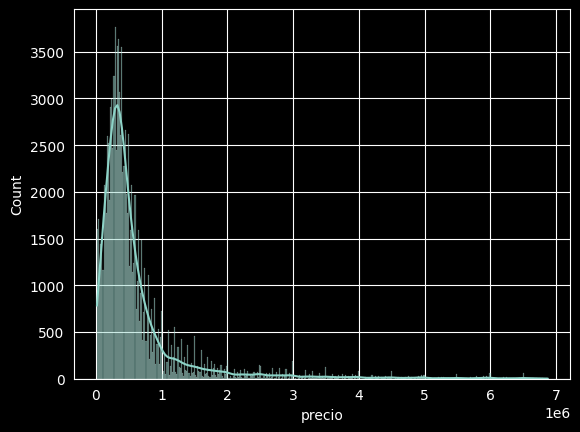

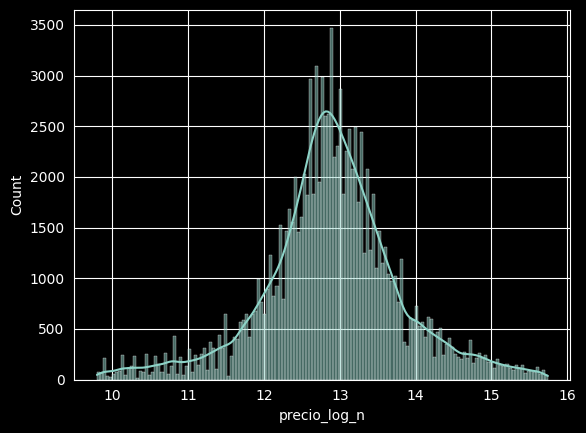

In [14]:
df_train['precio_log_n'] = np.log1p(df_train['precio'])
p1 = df_train['precio'].quantile(0.01)
p99 = df_train['precio'].quantile(0.99)

df_train_filtered = df_train[(df_train['precio'] >= p1) & (df_train['precio'] <= p99)]
sns.histplot(df_train_filtered['precio'], kde=True)
plt.show()

p1_log = df_train['precio_log_n'].quantile(0.01)
p99_log = df_train['precio_log_n'].quantile(0.99)

df_train_filtered_log = df_train[(df_train['precio_log_n'] >= p1_log) & (df_train['precio_log_n'] <= p99_log)]
sns.histplot(df_train_filtered_log['precio_log_n'], kde=True)
plt.show()


/tmp/ipykernel_26293/155983264.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.johnsonsu)
/tmp/ipykernel_26293/155983264.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log, kde=False, fit=stats.johnsonsu)
/tmp/ipykernel_26293/155983264.py:19: UserWarning: 

`

<Axes: title={'center': 'Log Normal price log'}, xlabel='precio_log_n'>

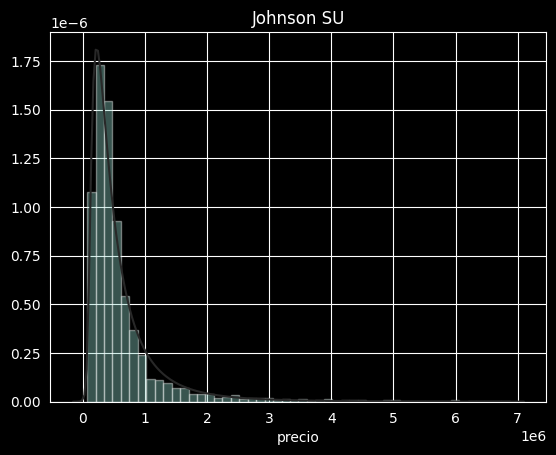

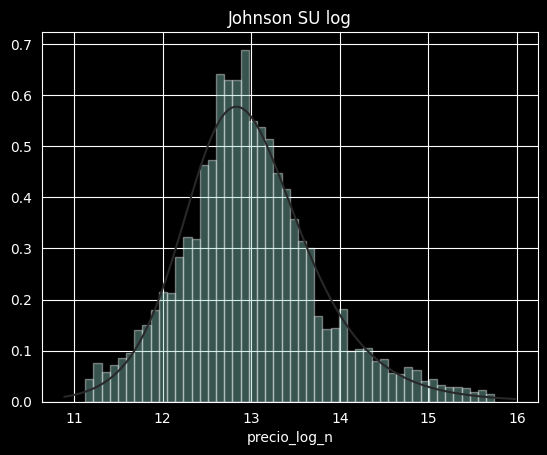

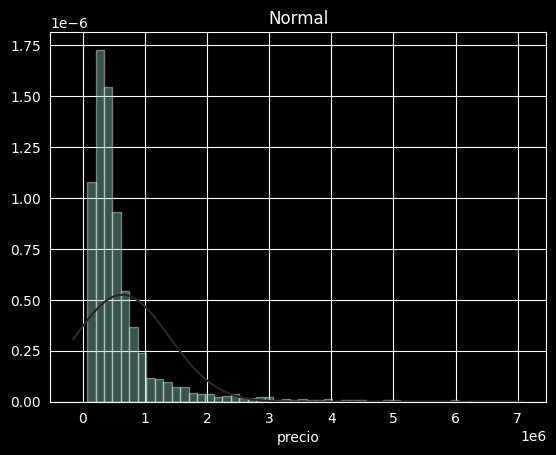

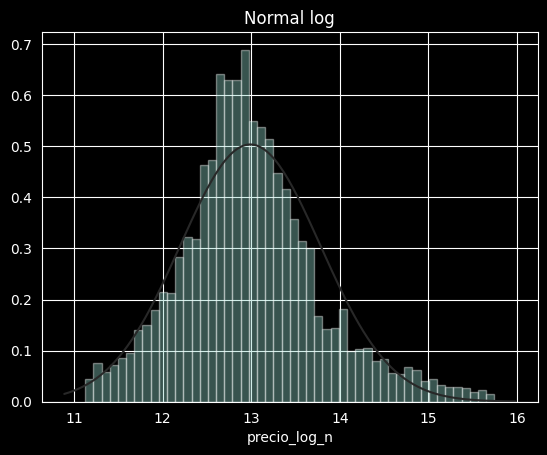

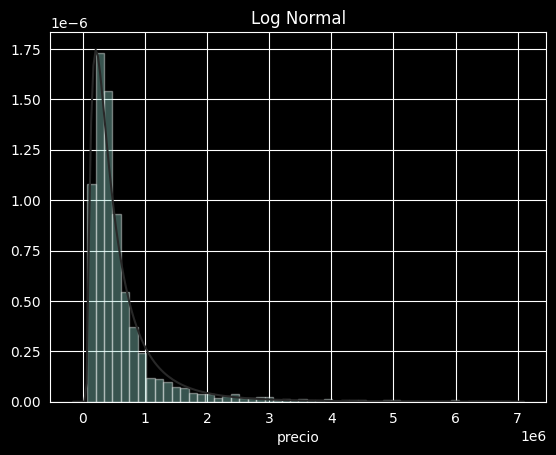

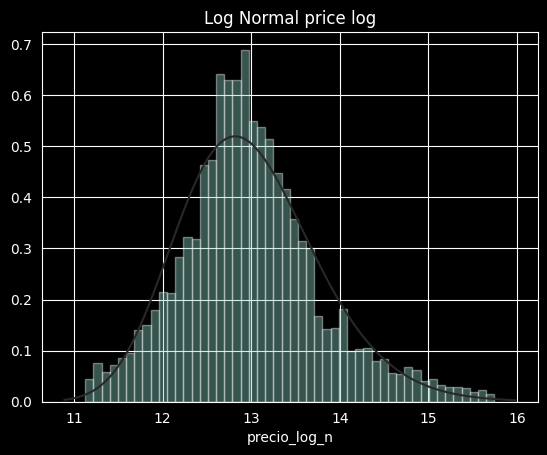

In [18]:

p1 = df_train['precio'].quantile(0.05)
p1_log = df_train['precio_log_n'].quantile(0.05)
p99 = df_train['precio'].quantile(0.99)
p99_log = df_train['precio_log_n'].quantile(0.99)

df_train_filtered = df_train[(df_train['precio'] >= p1) & (df_train['precio'] <= p99)]
y = df_train_filtered['precio']

df_train_filtered_log = df_train[(df_train['precio_log_n'] >= p1_log) & (df_train['precio_log_n'] <= p99_log)]
y_log = df_train_filtered_log['precio_log_n']

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

plt.figure(2); plt.title('Johnson SU log')
sns.distplot(y_log, kde=False, fit=stats.johnsonsu)

plt.figure(3); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.figure(4); plt.title('Normal log')
sns.distplot(y_log, kde=False, fit=stats.norm)

plt.figure(5); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

plt.figure(6); plt.title('Log Normal price log')
sns.distplot(y_log, kde=False, fit=stats.lognorm)

In [19]:
df_train_1 = df_train[(df_train['precio'] > p99)]
df_train_1['descripcion']

160       This stunning residence, set on an oversized 12,262 SF lot, offers 5,528 SF of beautifully desig...
186       Experience the pinnacle of luxury living in this extraordinary lakefront estate located in the w...
259       A rare chance to own Breezy Oaks, a tropical ranch, oasis and retreat unlike any other in South ...
294       Rarely available distinctive two-story penthouse at desirable Las Olas Beach Club. This exceptio...
300       Discover luxury oceanfront living on 1.09 elevated and secluded acres with 104' of beach frontag...
                                                         ...                                                 
109468    HUGE DEAL in Miami’s most prized residential tower. The most coveted South corner floor plan boa...
109582    Welcome to your dream home in the highly sought-after Village Del Mar! Built in 2014, this moder...
109631    NOT IN A FLOOD ZONE & NEVER LOST POWER! This 2022 custom-built Old Naples home combines luxury a...
109641    

In [22]:
df_train['precio_log_n'] = np.log1p(df_train['precio'])
print(df_train[['precio', 'precio_log_n']].describe())

             precio   precio_log_n
count  1.099680e+05  109968.000000
mean   7.451507e+05      12.863175
std    2.191973e+06       1.231815
min    0.000000e+00       0.000000
25%    2.499000e+05      12.428820
50%    3.989970e+05      12.896712
75%    6.500000e+05      13.384729
max    2.850000e+08      19.468000


Ahora comprobaremos la normalidad del resto de variables numéricas del dataset, para ello, ejecutamos el test de Shapiro–Wilk, que comprueba si una variable sigue una distribución normal.

````stats.shapiro(...)```` devuelve dos valores:
(estadístico, p_value)

Se compara p_value < 0.01:

- Si es True → la variable NO es normal

- Si es False → no se rechaza normalidad (podría ser normal)

In [20]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())
print(normal)

False
dormitorios                 True
banos                       True
codigo_postal               True
longitud                    True
latitud                     True
area_habitable              True
tamano_lote                 True
valor_area_lote             True
valor_area_habitable        True
tasa_impuesto_propiedad     True
conteo_fotos                True
conteo_vistas_recorrido     True
dias_en_portal              True
fuera_del_mercado          False
dias_en_portal_detalle      True
dtype: bool


/home/srvazquez/workspace/MasterIA/HerramientasComputacionales/KaggleDatasetFlorida/KaggleFloridaDataset/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 109968.
  res = hypotest_fun_out(*samples, **kwds)
/home/srvazquez/workspace/MasterIA/HerramientasComputacionales/KaggleDatasetFlorida/KaggleFloridaDataset/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


We had false so these variables should be transformed aswell

Now, let's explore this 1% more expensive of the dataset

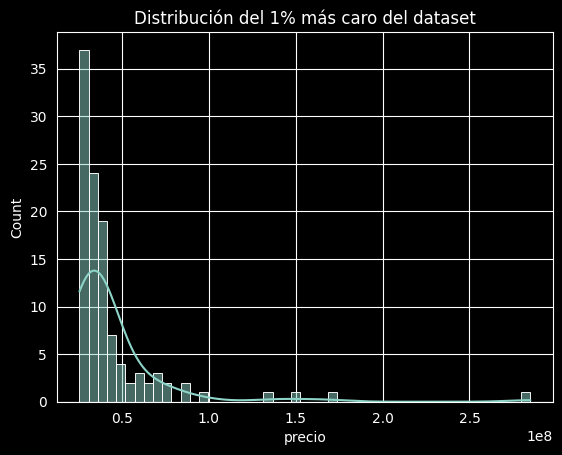

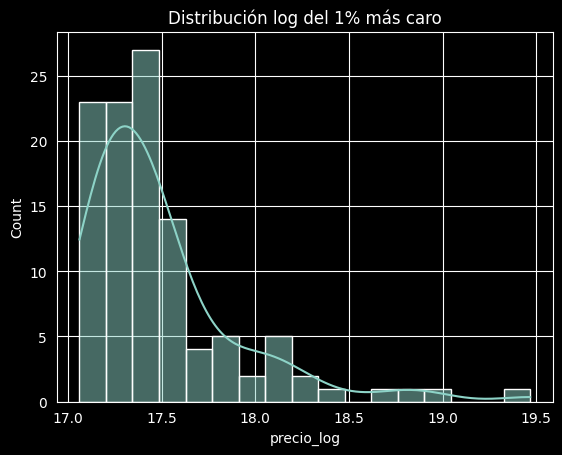

In [21]:
# 5% percentaje more expensive houses
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ umbral del 95% → top 5% más caro
p99 = df_train['precio'].quantile(0.999)

# 2️⃣ filtrar solo propiedades más caras
df_top1 = df_train[df_train['precio'] >= p99]

# 3️⃣ graficar distribución del top 5%
sns.histplot(df_top1['precio'], kde=True)
plt.title("Distribución del 1% más caro del dataset")
plt.xlabel("precio")
plt.show()

import numpy as np
df_top1_log = df_top1.copy()
df_top1_log['precio_log'] = np.log1p(df_top1_log['precio'])

sns.histplot(df_top1_log['precio_log'], kde=True)
plt.title("Distribución log del 1% más caro")
plt.show()



In [22]:
df_top1.describe()

,id,dormitorios,banos,precio,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,conteo_vistas_recorrido,dias_en_portal,dias_en_portal_detalle,precio_log_n
count,110.000000,105.000000,106.000000,1.100000e+02,110.000000,109.000000,109.000000,102.000000,9.500000e+01,95.000000,102.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000
mean,60785.954545,7.114286,10.047170,4.450985e+07,33431.145455,-80.309174,26.366510,11158.019608,6.587818e+05,133.863989,11158.019608,1.760273,49.872727,0.0,204.681818,204.681818,17.490019
std,34649.078617,8.479970,8.729132,3.282589e+07,405.564209,0.606653,0.588989,7979.334783,4.671872e+06,930.273543,7979.334783,0.230020,35.729901,0.0,170.196483,170.196483,0.420664
min,1141.000000,1.000000,0.000000,2.570000e+07,32696.000000,-82.826700,24.970753,0.000000,2.613000e+03,0.287000,0.000000,0.820000,1.000000,0.0,0.000000,0.000000,17.062002
25%,23286.000000,5.000000,7.000000,2.991250e+07,33156.000000,-80.164986,25.947720,7026.250000,2.001600e+04,0.470000,7026.250000,1.740000,19.000000,0.0,75.500000,75.500000,17.213787
50%,64968.500000,6.000000,9.000000,3.572500e+07,33407.500000,-80.117150,26.268002,9577.000000,3.510100e+04,0.879155,9577.000000,1.740000,42.500000,0.0,164.500000,164.500000,17.391349
75%,93015.000000,7.000000,11.000000,4.280000e+07,33480.000000,-80.047490,26.712132,13116.750000,6.024300e+04,1.437750,13116.750000,1.840000,76.250000,0.0,269.750000,269.750000,17.572040
max,108921.000000,91.000000,91.000000,2.850000e+08,34997.000000,-80.035416,29.418238,70786.000000,4.477968e+07,8667.000000,70786.000000,2.160000,184.000000,0.0,692.000000,692.000000,19.468000


In [23]:
df_top1[df_top1['precio']==25700000.0]

,id,ciudad,estado,estado_propiedad,dormitorios,banos,precio,codigo_postal,longitud,latitud,area_habitable,tipo_vivienda,tamano_lote,valor_area_lote,unidades_area_lote,valor_area_habitable,direccion_no_divulgada,pais,tasa_impuesto_propiedad,conteo_fotos,es_constructor_premier,conteo_vistas_recorrido,url_tour_virtual_tercero_aprobado,descripcion,oferta_inmediata_habilitada,dias_en_portal,dimension_tipo_propiedad,dimension_tipo_hdp,zona_horaria,elegibilidad_recorrido,auto_recorrido,servicios,dimension_tipo_publicacion,fuera_del_mercado,es_mostrado,interior,resumen,listado_por_administracion,interior_completo,construccion,detalles_comunidad,puntajes_movilidad,dias_en_portal_detalle,movilidad,riesgos_climaticos,precio_log_n
83287,83288,Williston,FL,FOR_SALE,3.0,4.0,25700000.0,32696,-82.34739,29.418238,1682.0,SINGLE_FAMILY,44779680.0,1028.0,Acres,1682.0,False,USA,1.62,56,False,0.0,False,"A fabulous opportunity to own 1,028 +/- acres of beautiful rolling hills graced with Granddaddy ...",No,264.0,Single Family,ForSale,America/New_York,"{""isPropertyTourEligible"":true}","{""hasSelfTour"":false}","[""Electric Service Available: Yes"",""Water: Well"",""Sewer: Septic Tank""]",For Sale by Agent,False,False,"{""bedrooms_and_bathrooms"":{""bathrooms"":4,""bedrooms"":3,""full_bathrooms"":2,""half_bathroom"":""2""},""f...","{""days_on_portal"":264,""number_of_saves"":46,""number_of_views"":1167}",False,"[{""title"":""PrimaryBedroom"",""values"":[""Features: Walk-In Closet(s)"",""Level: First""]},{""title"":""Ki...","[{""title"":""Type & style"",""values"":[""Home type: SingleFamily"",""Architectural style: Ranch"",""Prope...","[{""title"":""Subdivision"",""values"":[""AG NON""]}]","{""bike_score"":null,""transit_score"":null,""walk_score"":null}",264.0,"{""bike"":{""description"":null,""score"":null},""transit"":{""description"":null,""score"":null},""walk"":{""d...","{""air_factor"":null,""fire_factor"":null,""flood_factor"":null,""heat_factor"":null,""wind_factor"":null}",17.062002


In [25]:
numerical_columns = df_top1.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns
# df_train[[numerical_columns]]
df_top1[numerical_columns].describe()

,id,dormitorios,banos,precio,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,conteo_vistas_recorrido,dias_en_portal,dias_en_portal_detalle,precio_log_n
count,110.000000,105.000000,106.000000,1.100000e+02,110.000000,109.000000,109.000000,102.000000,9.500000e+01,95.000000,102.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000
mean,60785.954545,7.114286,10.047170,4.450985e+07,33431.145455,-80.309174,26.366510,11158.019608,6.587818e+05,133.863989,11158.019608,1.760273,49.872727,0.0,204.681818,204.681818,17.490019
std,34649.078617,8.479970,8.729132,3.282589e+07,405.564209,0.606653,0.588989,7979.334783,4.671872e+06,930.273543,7979.334783,0.230020,35.729901,0.0,170.196483,170.196483,0.420664
min,1141.000000,1.000000,0.000000,2.570000e+07,32696.000000,-82.826700,24.970753,0.000000,2.613000e+03,0.287000,0.000000,0.820000,1.000000,0.0,0.000000,0.000000,17.062002
25%,23286.000000,5.000000,7.000000,2.991250e+07,33156.000000,-80.164986,25.947720,7026.250000,2.001600e+04,0.470000,7026.250000,1.740000,19.000000,0.0,75.500000,75.500000,17.213787
50%,64968.500000,6.000000,9.000000,3.572500e+07,33407.500000,-80.117150,26.268002,9577.000000,3.510100e+04,0.879155,9577.000000,1.740000,42.500000,0.0,164.500000,164.500000,17.391349
75%,93015.000000,7.000000,11.000000,4.280000e+07,33480.000000,-80.047490,26.712132,13116.750000,6.024300e+04,1.437750,13116.750000,1.840000,76.250000,0.0,269.750000,269.750000,17.572040
max,108921.000000,91.000000,91.000000,2.850000e+08,34997.000000,-80.035416,29.418238,70786.000000,4.477968e+07,8667.000000,70786.000000,2.160000,184.000000,0.0,692.000000,692.000000,19.468000


In [29]:
print(len(df_train))
print(len(df_test))

109968
39867


# Describe the features and know the different columns

In [65]:
df_train.describe()

,id,dormitorios,banos,precio,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,conteo_vistas_recorrido,dias_en_portal,dias_en_portal_detalle,precio_log_n,desc_char_len,desc_word_len
count,109968.000000,102884.000000,106172.000000,1.099680e+05,109968.000000,109634.000000,109634.000000,102508.000000,7.765000e+04,77653.000000,102519.000000,109963.000000,109968.000000,109963.000000,109968.000000,109886.000000,109968.000000,109968.000000,109968.000000
mean,54999.333724,2.939116,2.417070,7.451507e+05,33438.615206,-81.700348,27.720065,1809.955496,2.991525e+05,4016.843278,1809.998522,1.634174,34.997727,0.190782,128.431416,128.486531,12.863175,1055.401126,171.100329
std,31754.880814,1.262672,6.875272,2.191973e+06,784.912341,1.564153,1.485346,1968.265071,1.433987e+07,4013.080178,1968.224261,0.310859,20.517149,15.505444,158.134698,158.168976,1.231815,670.011928,108.181832
min,1.000000,0.000000,0.000000,0.000000e+00,32003.000000,-111.477200,24.548346,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000,-33.000000,0.000000,0.000000,0.000000
25%,27496.750000,2.000000,2.000000,2.499000e+05,32909.000000,-82.336260,26.424290,1152.000000,5.847000e+03,0.800000,1152.000000,1.460000,21.000000,0.000000,32.000000,32.000000,12.428820,611.000000,99.000000
50%,55000.500000,3.000000,2.000000,3.989970e+05,33426.000000,-81.614470,27.704355,1576.000000,9.147000e+03,3948.000000,1576.000000,1.730000,33.000000,0.000000,83.000000,83.000000,12.896712,836.000000,138.000000
75%,82498.250000,4.000000,3.000000,6.500000e+05,33974.000000,-80.334952,28.708779,2148.000000,1.452075e+04,7416.000000,2148.000000,1.840000,47.000000,0.000000,168.000000,168.000000,13.384729,1376.000000,223.000000
max,110000.000000,91.000000,2204.000000,2.850000e+08,35459.000000,-70.615395,46.833220,418176.000000,1.897474e+09,229568.411400,418176.000000,2.160000,209.000000,3384.000000,4908.000000,4908.000000,19.468000,10709.000000,1612.000000


## Process description column

In [26]:
import re
import pandas as pd
import numpy as np

def basic_text_cleaning(text: str) -> str:
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", " ", text)
    
    # Replace non-alphabetic chars (keep spaces)
    text = re.sub(r"[^a-z\s]", " ", text)
    
    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    return text


In [27]:
# Ensure string type and fill NaNs
desc = df_train["descripcion"].fillna("").astype(str)

# Character length (vectorized, very fast)
df_train["desc_char_len"] = desc.str.len()

# Word count WITHOUT split (regex-based, vectorized)
df_train["desc_word_len"] = desc.str.count(r"\b\w+\b")

length_stats = df_train[["desc_char_len", "desc_word_len"]].describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
)

print(length_stats)


       desc_char_len  desc_word_len
count  109968.000000  109968.000000
mean     1055.401126     171.100329
std       670.011928     108.181832
min         0.000000       0.000000
10%       387.000000      63.000000
25%       611.000000      99.000000
50%       836.000000     138.000000
75%      1376.000000     223.000000
90%      1974.000000     319.000000
95%      2383.000000     385.000000
max     10709.000000    1612.000000


In [28]:
total = len(df_train)

empty = (df_train["desc_word_len"] == 0).sum()
short = (df_train["desc_word_len"] < 20).sum()

print(f"Empty descriptions: {empty} ({empty/total:.2%})")
print(f"Very short (<20 words): {short} ({short/total:.2%})")


Empty descriptions: 269 (0.24%)
Very short (<20 words): 1435 (1.30%)


In [29]:
import re
from collections import Counter

# Sample 20k rows max (more than enough for token distribution)
sample_desc = desc.sample(n=min(100000, len(desc)), random_state=42)

tokens = (
    sample_desc
    .str.lower()
    .str.findall(r"\b[a-z]{3,}\b")  # words >= 3 letters
    .explode()
)

top_20_tokens = tokens.value_counts().head(20)
print(top_20_tokens)


descripcion
and          722884
the          682484
with         311494
this         227853
for          220276
home         196346
your         109719
living       103580
you          100086
room          96122
new           94412
kitchen       81835
bedroom       74776
community     71614
from          70569
pool          69442
offers        69340
space         65353
perfect       61433
has           58176
Name: count, dtype: int64


In [41]:
texts = (
    df_train["descripcion"]
    .fillna("")
    .astype(str)
    .str.slice(0, 4000)  # safety cap, avoids extreme cases
    .tolist()
)


In [42]:
model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    texts,
    batch_size=64,
    show_progress_bar=True,
    normalize_embeddings=True
)

embeddings.shapef
# (109968, 384)


Batches: 100%|██████████| 1719/1719 [13:21<00:00,  2.14it/s]


(109968, 384)

In [43]:
np.save("text_embeddings.npy", embeddings)


In [30]:
print(f"area_habitable rows with 0 value: {df_train[df_train['area_habitable']==0].shape[0]}")
print(f"dormitorios rows with 0 value: {df_train[df_train['dormitorios']==0].shape[0]}")
print(f"banos rows with 0 value: {df_train[df_train['banos']==0].shape[0]}")
print(f"precio rows with 0 value: {df_train[df_train['precio']==0].shape[0]}")
print(f"tamano_lote rows with 0 value: {df_train[df_train['tamano_lote']==0].shape[0]}")
print(f"valor_area_lote rows with 0 value: {df_train[df_train['valor_area_lote']==0].shape[0]}")
print(f"valor_area_habitable rows with 0 value: {df_train[df_train['valor_area_habitable']==0].shape[0]}")
print(f"tasa_impuesto_propiedad rows with 0 value: {df_train[df_train['tasa_impuesto_propiedad']==0].shape[0]}")
print(f"conteo_fotos rows with 0 value: {df_train[df_train['conteo_fotos']==0].shape[0]}")
print(f"conteo_vistas_recorrido rows with 0 value: {df_train[df_train['conteo_vistas_recorrido']==0].shape[0]}")

area_habitable rows with 0 value: 1249
dormitorios rows with 0 value: 730
banos rows with 0 value: 3472
precio rows with 0 value: 318
tamano_lote rows with 0 value: 1344
valor_area_lote rows with 0 value: 1293
valor_area_habitable rows with 0 value: 1249
tasa_impuesto_propiedad rows with 0 value: 553
conteo_fotos rows with 0 value: 1
conteo_vistas_recorrido rows with 0 value: 109931


Como vemos, el precio no puede ser 0, así que eliminamos esas filas.
El resto, tanto conteo_fotos como conteo_vistas_recorrido tiene sentido.

La tasa de impuesto de propiedad, el valor de area del lote, el valor de area habitable lo calcularemos en base a la zona, por la mediana de la ciudad correspondiente o el codigo postal

In [31]:
df_train_clean = df_train[df_train['precio'] > 0]

In [32]:
def info_con_porcentaje(df):
    total = len(df)
    print(f"<class 'pandas.core.frame.DataFrame'>")
    print(f"RangeIndex: {total} entries, 0 to {total-1}")
    print(f"Data columns (total {df.shape[1]} columns):")
    print(" #   Column                              Non-Null Count  Dtype     % Non-Null")
    print("---  ------                              --------------  -----     -----------")
    for i, col in enumerate(df.columns):
        non_null = df[col].notnull().sum()
        dtype = str(df[col].dtype)
        porcentaje = (non_null / total) * 100
        print(f"{i:<4} {col:<35} {non_null:>14}  {dtype:<9} {porcentaje:9.2f}%")

info_con_porcentaje(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109968 entries, 0 to 109967
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype     % Non-Null
---  ------                              --------------  -----     -----------
0    id                                          109968  int64        100.00%
1    ciudad                                      109968  object       100.00%
2    estado                                      109968  object       100.00%
3    estado_propiedad                            109968  object       100.00%
4    dormitorios                                 102884  float64       93.56%
5    banos                                       106172  float64       96.55%
6    precio                                      109968  float64      100.00%
7    codigo_postal                               109968  int64        100.00%
8    longitud                                    109634  float64       99.70%
9    latitud                  

## Process Json columns

### construccion

In [69]:
import json
import pandas as pd

def parse_json_field(x):
    try:
        return json.loads(x)
    except:
        return None


In [181]:
df_train_clean['construccion'].unique()  
df_train_clean["construccion_json"] = df_train_clean["construccion"].apply(parse_json_field)
df_train_clean['construccion_json']

df_test['construccion'].unique()
df_test["construccion_json"] = df_test["construccion"].apply(parse_json_field)
df_test['construccion_json']

/tmp/ipykernel_21889/3732027348.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'construccion'

In [ ]:
import re

def parse_construccion_entry(entry):
    """
    entry = lista de secciones [{'title':..., 'values':[...]}]
    devuelve dict plano
    """
    result = {}

    if not isinstance(entry, list):
        return result

    for block in entry:
        values = block.get("values", [])
        for v in values:
            # Ej.: "Home type: Condo"
            if ":" in v:
                key, value = v.split(":", 1)
                key = key.strip().lower().replace(" ", "_")
                value = value.strip()
            else:
                # para rarezas
                key = block.get("title", "unknown").lower().replace(" ", "_")
                value = v

            result[key] = value

    return result


In [ ]:
df_train_clean["construccion_dict"] = df_train_clean["construccion_json"].apply(parse_construccion_entry)

print(df_train_clean["construccion_dict"].head())

df_construccion = df_train_clean["construccion_dict"].apply(pd.Series)
df_construccion.head()

df_train_clean = pd.concat([df_train_clean, df_construccion], axis=1)

df_train_clean["year_built"] = pd.to_numeric(df_train_clean["year_built"], errors="coerce")

df_train_clean.drop(columns=["construccion_dict", "construccion_json", "construccion"], inplace=True)


df_test["construccion_dict"] = df_test["construccion_json"].apply(parse_construccion_entry)

print(df_test["construccion_dict"].head())

df_construccion = df_test["construccion_dict"].apply(pd.Series)
df_construccion.head()

df_test = pd.concat([df_test, df_construccion], axis=1)

df_test["year_built"] = pd.to_numeric(df_test["year_built"], errors="coerce")

df_test.drop(columns=["construccion_dict", "construccion_json", "construccion"], inplace=True)




In [ ]:
df_train_clean.info()

In [71]:
# df_train_clean.drop(columns=['architectural_style', 'roof', 'property_condition', 'foundation', 'new_construction', 'builder_name', 'builder_model', 'major_remodel_year', 'land_development_status'], inplace=True)
# df_test.drop(columns=['architectural_style', 'roof', 'property_condition', 'foundation', 'new_construction', 'builder_name', 'builder_model', 'major_remodel_year', 'land_development_status'], inplace=True)

### elegibilidad_recorrido

In [72]:
df_train_clean['elegibilidad_recorrido_json'] = df_train_clean['elegibilidad_recorrido'].apply(parse_json_field)
df_train_clean["is_property_tour_eligible"] = df_train_clean["elegibilidad_recorrido_json"].apply(
    lambda d: d.get("isPropertyTourEligible") if isinstance(d, dict) else None
)
df_train_clean["is_property_tour_eligible"] = (
    df_train_clean["is_property_tour_eligible"].astype(float) * 1
)

df_train_clean.drop(columns=["elegibilidad_recorrido_json", "elegibilidad_recorrido"], inplace=True)
df_train_clean.info()

df_test['elegibilidad_recorrido_json'] = df_test['elegibilidad_recorrido'].apply(parse_json_field)
df_test["is_property_tour_eligible"] = df_test["elegibilidad_recorrido_json"].apply(
    lambda d: d.get("isPropertyTourEligible") if isinstance(d, dict) else None
)
df_test["is_property_tour_eligible"] = (
    df_test["is_property_tour_eligible"].astype(float) * 1
)

df_test.drop(columns=["elegibilidad_recorrido_json", "elegibilidad_recorrido"], inplace=True)
df_test.info()

/tmp/ipykernel_21889/310188759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['elegibilidad_recorrido_json'] = df_train_clean['elegibilidad_recorrido'].apply(parse_json_field)
/tmp/ipykernel_21889/310188759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean["is_property_tour_eligible"] = df_train_clean["elegibilidad_recorrido_json"].apply(
/tmp/ipykernel_21889/310188759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<class 'pandas.core.frame.DataFrame'>
Index: 109650 entries, 0 to 109999
Data columns (total 49 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 109650 non-null  int64  
 1   ciudad                             109650 non-null  object 
 2   estado                             109650 non-null  object 
 3   estado_propiedad                   109650 non-null  object 
 4   dormitorios                        102592 non-null  float64
 5   banos                              105873 non-null  float64
 6   precio                             109650 non-null  float64
 7   codigo_postal                      109650 non-null  int64  
 8   longitud                           109316 non-null  float64
 9   latitud                            109316 non-null  float64
 10  area_habitable                     102204 non-null  float64
 11  tipo_vivienda                      109650 no

KeyError: 'elegibilidad_recorrido'

### auto_recorrido

In [73]:
### hasSelfTour

# <!-- auto_recorrido similar {"hasSelfTour": true} o {"hasSelfTour": false} -->

df_train_clean['auto_recorrido_json'] = df_train_clean['auto_recorrido'].apply(parse_json_field)
df_train_clean["has_self_tour"] = df_train_clean["auto_recorrido_json"].apply(
    lambda d: d.get("hasSelfTour") if isinstance(d, dict) else None
)
df_train_clean["has_self_tour"]
df_train_clean["has_self_tour"] = (
    df_train_clean["has_self_tour"].astype(float) * 1
)

df_train_clean.drop(columns=["auto_recorrido_json", "auto_recorrido"], inplace=True)
df_train_clean.info()

### hasSelfTour

# <!-- auto_recorrido similar {"hasSelfTour": true} o {"hasSelfTour": false} -->

df_test['auto_recorrido_json'] = df_test['auto_recorrido'].apply(parse_json_field)
df_test["has_self_tour"] = df_test["auto_recorrido_json"].apply(
    lambda d: d.get("hasSelfTour") if isinstance(d, dict) else None
)
df_test["has_self_tour"]
df_test["has_self_tour"] = (
    df_test["has_self_tour"].astype(float) * 1
)

df_test.drop(columns=["auto_recorrido_json", "auto_recorrido"], inplace=True)
df_test.info()

/tmp/ipykernel_21889/2091243641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['auto_recorrido_json'] = df_train_clean['auto_recorrido'].apply(parse_json_field)
/tmp/ipykernel_21889/2091243641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean["has_self_tour"] = df_train_clean["auto_recorrido_json"].apply(
/tmp/ipykernel_21889/2091243641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

<class 'pandas.core.frame.DataFrame'>
Index: 109650 entries, 0 to 109999
Data columns (total 49 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 109650 non-null  int64  
 1   ciudad                             109650 non-null  object 
 2   estado                             109650 non-null  object 
 3   estado_propiedad                   109650 non-null  object 
 4   dormitorios                        102592 non-null  float64
 5   banos                              105873 non-null  float64
 6   precio                             109650 non-null  float64
 7   codigo_postal                      109650 non-null  int64  
 8   longitud                           109316 non-null  float64
 9   latitud                            109316 non-null  float64
 10  area_habitable                     102204 non-null  float64
 11  tipo_vivienda                      109650 no

KeyError: 'auto_recorrido'

In [ ]:
import ast

def parse_list_column(x):
    try:
        return ast.literal_eval(x)
    except:
        return []
    
def extract_key(item):
    """Extrae la key de un string tipo 'Key: Value' o 'Flag Connected'."""
    if ":" in item:
        key = item.split(":", 1)[0].strip()
    else:
        key = item.strip()

    # normalización (como luego será nombre de columna)
    key = key.lower().replace(" ", "_")
    return key

### servicios

In [74]:
from collections import Counter

counter = Counter()

for lst in df_train_clean["servicios"].apply(parse_list_column):
    for item in lst:
        key = extract_key(item)
        counter[key] += 1

counter

Counter({'water': 55474,
         'sewer': 52945,
         'electric_service_available': 24369,
         'electricity_connected': 12675,
         'cable_available': 9327,
         'water_connected': 8073,
         'cable_connected': 7064,
         'sewer_connected': 6906,
         'public': 4510,
         'electricity_available': 4378,
         'bb/hs_internet_available': 3218,
         'water_available': 2929,
         'underground_utilities': 2588,
         'green_energy_efficient': 2455,
         'street_lights': 2425,
         'sewer_available': 1819,
         'phone_available': 1664,
         'gas': 1420,
         'natural_gas_connected': 1279,
         'high_speed_internet_available': 1047,
         'other': 837,
         'green_water_conservation': 655,
         'green_energy_genetation': 581,
         'electrical_nearby': 525,
         'none': 515,
         'fire_hydrant': 504,
         'sprinkler_recycled': 490,
         'natural_gas_available': 448,
         'fiber_optics': 4

In [75]:
mapping_servicios = {
    # Agua
    "water": "agua",
    "water_connected": "agua",
    "water_available": "agua",
    "water_not_available": "agua",
    "water_nearby": "agua",
    "irrigation_water": "agua",
    "city_water": "agua",
    "public_water": "agua",
    "water_-_multiple_meters": "agua",
    "separate_water_meters": "agua",
    "water_separate_meter": "agua",
    "public_municipal_water": "agua",

    # Alcantarillado
    "sewer": "alcantarillado",
    "sewer_connected": "alcantarillado",
    "sewer_available": "alcantarillado",
    "sewer_not_available": "alcantarillado",
    "septic_available": "alcantarillado",
    "septic_tank": "alcantarillado",
    "mini_sewer": "alcantarillado",
    "public_sewer": "alcantarillado",
    "municipal_sewer": "alcantarillado",
    "sewer_nearby": "alcantarillado",

    # Electricidad
    "electric_service_available": "electricidad",
    "electricity_connected": "electricidad",
    "electricity_available": "electricidad",
    "electricity_not_available": "electricidad",
    "electrical_nearby": "electricidad",
    "electric": "electricidad",
    "underground_utilities": "electricidad",
    "utility_pole": "electricidad",
    "110/220": "electricidad",
    "separate_electric_meters": "electricidad",
    "elect_separate_meter": "electricidad",

    # Internet / cable / telecom
    "cable_available": "internet",
    "cable_connected": "internet",
    "cable_not_available": "internet",
    "phone_available": "internet",
    "phone_not_available": "internet",
    "phone_connected": "internet",
    "telephone": "internet",
    "telephone_nearby": "internet",
    "phone": "internet",
    "internet": "internet",
    "internet_available": "internet",
    "bb/hs_internet_available": "internet",
    "high_speed_internet_available": "internet",
    "fiber_optics": "internet",
    "optical": "internet",
    "bb/hs_internet_capable": "internet",

    # Gas
    "gas": "gas",
    "propane": "gas",
    "natural_gas_available": "gas",
    "naturl_gas_available": "gas",  # typo frecuente
    "natural_gas_not_available": "gas",
    "natural_gas_connected": "gas",
    "gas_bottle": "gas",
    "gas_-_natural": "gas",
    "gas_-_piped": "gas",

    # Energía verde / sostenibilidad
    "green_energy_efficient": "sostenible",
    "green_water_conservation": "sostenible",
    "green_energy_genetation": "sostenible",
    "green_indoor_air_quality": "sostenible",
    "green_sustainability": "sostenible",
    "solar": "sostenible",
    "green_building_verification_type": "sostenible",

    # Residuos / basura
    "trash_collection": "basura",
    "private_trash": "basura",
    "city_trash": "basura",
    "county_trash": "basura",
    "trash_removal": "basura",
    "trash_collection_public": "basura",

    # Otros servicios
    "public": "otros",
    "private": "otros",
    "public_municipal": "otros",
    "street_lights": "otros",
    "yard_maintenance": "otros",
    "pump_out_station": "otros",
    "lift_station": "otros",
    "buyer_to_verify": "otros",
    "other": "otros",
    "other_-_see_remarks": "otros",
    "other_see_remarks": "otros",
    "railroad": "otros",
    "utilities_not_on_site": "otros",
    "sprinkler_recycled": "otros",
    "sprinkler_meter": "otros",
    "sprinkler_well": "otros",
    "fkaa": "otros",
    "tap_fee_paid": "otros",
    "tap_fee_due": "otros",
    "see_remarks": "otros",
    "private_well": "otros"
}


In [76]:
def map_servicio(key):
    return mapping_servicios.get(key, "otros")  # fallback seguro

df_train_clean["servicios_grouped"] = (
    df_train_clean["servicios"]
    .apply(parse_list_column)
    .apply(lambda lst: list({map_servicio(extract_key(i)) for i in lst}))
)
df_train_clean.info()


df_test["servicios_grouped"] = (
    df_test["servicios"]
    .apply(parse_list_column)
    .apply(lambda lst: list({map_servicio(extract_key(i)) for i in lst}))
)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109650 entries, 0 to 109999
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 109650 non-null  int64  
 1   ciudad                             109650 non-null  object 
 2   estado                             109650 non-null  object 
 3   estado_propiedad                   109650 non-null  object 
 4   dormitorios                        102592 non-null  float64
 5   banos                              105873 non-null  float64
 6   precio                             109650 non-null  float64
 7   codigo_postal                      109650 non-null  int64  
 8   longitud                           109316 non-null  float64
 9   latitud                            109316 non-null  float64
 10  area_habitable                     102204 non-null  float64
 11  tipo_vivienda                      109650 no

/tmp/ipykernel_21889/848979651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean["servicios_grouped"] = (


KeyError: 'servicios'

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def process_servicios_column(df, mlb=None, fit=True):
    if fit:
        mlb = MultiLabelBinarizer()
        serv_mat = mlb.fit_transform(df["servicios_grouped"])
    else:
        serv_mat = mlb.transform(df["servicios_grouped"])
    
    df_serv = pd.DataFrame(
        serv_mat,
        columns=[f"serv_{c}" for c in mlb.classes_],
        index=df.index
    )
    
    df = df.join(df_serv)
    df[[f"serv_{c}" for c in mlb.classes_]] = df[[f"serv_{c}" for c in mlb.classes_]].fillna(0)
    
    return df, mlb

# Procesar entrenamiento
df_train_clean, mlb = process_servicios_column(df_train_clean, fit=True)

# Procesar test usando el mismo MultiLabelBinarizer entrenado
df_test, _ = process_servicios_column(df_test, mlb=mlb, fit=False)


In [77]:
# Rellenamos NaNs con 0 (no tiene ese servicio)
df_train_clean[[f"serv_{c}" for c in mlb.classes_]] = df_train_clean[[f"serv_{c}" for c in mlb.classes_]].fillna(0)

df_train_clean.info()

# Rellenamos NaNs con 0 (no tiene ese servicio)
df_test[[f"serv_{c}" for c in mlb.classes_]] = df_test[[f"serv_{c}" for c in mlb.classes_]].fillna(0)

df_test.info()

KeyError: "None of [Index(['serv_agua', 'serv_alcantarillado', 'serv_basura', 'serv_electricidad', 'serv_gas',\n       'serv_internet', 'serv_otros', 'serv_sostenible'],\n      dtype='object')] are in the [columns]"

In [78]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109650 entries, 0 to 109999
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 109650 non-null  int64  
 1   ciudad                             109650 non-null  object 
 2   estado                             109650 non-null  object 
 3   estado_propiedad                   109650 non-null  object 
 4   dormitorios                        102592 non-null  float64
 5   banos                              105873 non-null  float64
 6   precio                             109650 non-null  float64
 7   codigo_postal                      109650 non-null  int64  
 8   longitud                           109316 non-null  float64
 9   latitud                            109316 non-null  float64
 10  area_habitable                     102204 non-null  float64
 11  tipo_vivienda                      109650 no

In [79]:
df_train_clean.drop(columns=["servicios", "servicios_grouped"], inplace=True)
df_test.drop(columns=["servicios", "servicios_grouped"], inplace=True)

/tmp/ipykernel_21889/846407559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=["servicios", "servicios_grouped"], inplace=True)


KeyError: "['servicios', 'servicios_grouped'] not found in axis"

### Interior

In [80]:
df_train_clean['interior'].value_counts()

interior
{"bedrooms_and_bathrooms":{"bedrooms":null,"half_bathroom":"null"}}                                                                                                                                                                                                                                                                                       3425
{"bedrooms_and_bathrooms":{"bathrooms":0,"bedrooms":null,"half_bathroom":"null"}}                                                                                                                                                                                                                                                                         2930
{"bedrooms_and_bathrooms":{"bathrooms":2,"bedrooms":2,"full_bathrooms":2,"half_bathroom":"0"}}                                                                                                                                                                                                   

In [81]:
df_train_clean['interior_dict'] = df_train_clean['interior'].apply(parse_json_field)
from collections import Counter

all_keys = df_train_clean["interior_dict"].dropna().apply(lambda x: list(x.keys()))
flat_keys = [key for sublist in all_keys for key in sublist]
Counter(flat_keys)


/tmp/ipykernel_21889/3752043541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['interior_dict'] = df_train_clean['interior'].apply(parse_json_field)


Counter({'bedrooms_and_bathrooms': 109649,
         'other_interior_features': 100135,
         'heating': 95223,
         'flooring': 87814,
         'kitchen': 14550})

In [82]:
def parse_features(txt):
    if not isinstance(txt, str):
        return {}
    parts = txt.split(',')
    out = {}
    for part in parts:
        if ':' in part:
            k, v = part.split(':', 1)
            out[k.strip()] = v.strip()
    return out

features_df = df_train_clean["interior_dict"].map(lambda d: parse_features(d.get("other_interior_features") if d else None)).apply(pd.Series)


In [83]:
features_df

,Total structure area,Finished area above ground,Total interior livable area
0,0,0,NaN
1,NaN,NaN,1
2,NaN,NaN,2
3,1,NaN,1
4,NaN,NaN,2
...,...,...,...
109995,NaN,NaN,NaN
109996,NaN,NaN,1
109997,1,NaN,1
109998,2,NaN,2


In [84]:
features_df['Total structure area'].unique()
# features_df['Finished area above ground'].unique()
# features_df['Total interior livable area'].unique()

array(['0', nan, '1', '905', '2', '998', '3', '840', '976', '4', '5',
       '922', '938', '720', '600', '610', '760', '6', '800', '792', '672',
       '24', '774', '864', '945', '477', '846', '763', '975', '978',
       '360', '970', '737', '741', '704', '695', '12', '739', '661',
       '746', '875', '960', '878', '956', '500', '767', '920', '328',
       '10', '950', '8', '680', '625', '538', '820', '428', '768', '849',
       '990', '973', '836', '818', '967', '459', '899', '900', '891',
       '520', '285', '989', '736', '389', '654', '888', '915', '561',
       '880', '432', '697', '798', '835', '986', '9', '829', '969', '7',
       '590', '13', '690', '828', '983', '566', '400', '924', '863',
       '832', '773', '902', '11', '710', '640', '912', '784', '516',
       '738', '668', '809', '852', '991', '489', '997', '850', '650',
       '691', '816', '577', '906', '508', '940', '684', '955', '797',
       '562', '951', '648', '925', '656', '747', '771', '896', '928',
       '833'

In [85]:
df_train_clean['interior_completo'].value_counts()

interior_completo
[{"title":"Bedrooms & bathrooms","values":["Bedrooms: 3","Full bathrooms: 2"]}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [86]:
df_train_clean

,id,ciudad,estado,estado_propiedad,dormitorios,banos,precio,codigo_postal,longitud,latitud,area_habitable,tipo_vivienda,tamano_lote,valor_area_lote,unidades_area_lote,valor_area_habitable,direccion_no_divulgada,pais,tasa_impuesto_propiedad,conteo_fotos,es_constructor_premier,conteo_vistas_recorrido,url_tour_virtual_tercero_aprobado,descripcion,oferta_inmediata_habilitada,dias_en_portal,dimension_tipo_propiedad,dimension_tipo_hdp,zona_horaria,dimension_tipo_publicacion,fuera_del_mercado,es_mostrado,interior,resumen,listado_por_administracion,interior_completo,construccion,detalles_comunidad,puntajes_movilidad,dias_en_portal_detalle,movilidad,riesgos_climaticos,precio_log_n,desc_char_len,desc_word_len,construccion_json,is_property_tour_eligible,has_self_tour,interior_dict
0,1,Lakeland,FL,FOR_SALE,3.0,2.0,119900.0,33810,-81.976610,28.146996,0.0,MANUFACTURED,NaN,NaN,sqft,0.0,False,USA,1.54,8,False,0.0,False,"Close enough to the action, yet far enough away to really feel like home, Sundance Village is a ...",No,362.0,Manufactured,ForSale,America/New_York,For Sale by Agent,False,False,"{""bedrooms_and_bathrooms"":{""bathrooms"":2,""bedrooms"":3,""full_bathrooms"":2,""half_bathroom"":""0""},""o...","{""days_on_portal"":362}",False,"[{""title"":""Bedrooms & bathrooms"",""values"":[""Bedrooms: 3"",""Bathrooms: 2"",""Full bathrooms: 2""]},{""...","[{""title"":""Type & style"",""values"":[""Home type: MobileManufactured"",""Property subType: Manufactur...",NaN,"{""bike_score"":null,""transit_score"":null,""walk_score"":null}",362.0,"{""bike"":{""description"":null,""score"":null},""transit"":{""description"":null,""score"":null},""walk"":{""d...","{""air_factor"":null,""fire_factor"":null,""flood_factor"":null,""heat_factor"":null,""wind_factor"":null}",11.694422,435,72,"[{'title': 'Type & style', 'values': ['Home type: MobileManufactured', 'Property subType: Manufa...",0.0,0.0,"{'bedrooms_and_bathrooms': {'bathrooms': 2, 'bedrooms': 3, 'full_bathrooms': 2, 'half_bathroom':..."
1,2,Pompano Beach,FL,FOR_SALE,3.0,2.0,290000.0,33067,-80.246210,26.287040,1166.0,CONDO,NaN,NaN,sqft,1166.0,False,USA,1.98,36,False,0.0,False,"Welcome to Edgewater, a highly sought-after all-ages gated community! ABLE TO RENT IMMEDIATELY! ...",No,45.0,Condo,ForSale,America/New_York,For Sale by Agent,False,False,"{""bedrooms_and_bathrooms"":{""bathrooms"":2,""bedrooms"":3,""full_bathrooms"":2,""half_bathroom"":""0""},""f...","{""days_on_portal"":45,""number_of_saves"":4,""number_of_views"":159}",False,"[{""title"":""Bedroom"",""values"":[""Features: Entry Level""]},{""title"":""Bedrooms & bathrooms"",""values""...","[{""title"":""Type & style"",""values"":[""Home type: Condo"",""Property subType: Condominium""]},{""title""...","[{""title"":""Subdivision"",""values"":[""Edgewater Condo""]},{""title"":""Features"",""values"":[""Bbq/Picnic ...","{""bike_score"":null,""transit_score"":null,""walk_score"":null}",45.0,"{""bike"":{""description"":null,""score"":null},""transit"":{""description"":null,""score"":null},""walk"":{""d...","{""air_factor"":null,""fire_factor"":null,""flood_factor"":null,""heat_factor"":null,""wind_factor"":null}",12.577640,799,121,"[{'title': 'Type & style', 'values': ['Home type: Condo', 'Property subType: Condominium']}, {'t...",1.0,0.0,"{'bedrooms_and_bathrooms': {'bathrooms': 2, 'bedrooms': 3, 'full_bathrooms': 2, 'half_bathroom':..."
2,3,Jacksonville,FL,FOR_SALE,3.0,3.0,599000.0,32205,-81.712930,30.296097,2157.0,SINGLE_FAMILY,11761.0,0.2700,Acres,2157.0,False,USA,1.79,57,False,0.0,False,"Welcome to 3854 Walsh Street a rare find in the heart of Avondale offering versatility, charm, a...",No,48.0,Single Family,ForSale,America/New_York,For Sale by Agent,False,False,"{""bedrooms_and_bathrooms"":{""bathrooms"":3,""bedrooms"":3,""full_bathrooms"":2,""half_bathroom"":""1""},""h...","{""days_on_portal"":48,""number_of_saves"":59,""number_of_views"":1118}",False,"[{""title"":""Bedrooms & bathrooms"",""values"":[""Bedrooms: 3"",""Bathrooms: 3"",""Ful

In [87]:
from collections import Counter

def extract_titles(lst):
    if isinstance(lst, list):
        return [item.get("title") for item in lst if isinstance(item, dict) and "title" in item]
    return []

df_train_clean['interior_completo_dict'] = df_train_clean['interior_completo'].apply(parse_json_field)
all_keys_com = df_train_clean["interior_completo_dict"].dropna().apply(
    lambda x: list(x.keys()) if isinstance(x, dict) else []
)
all_titles = df_train_clean["interior_completo_dict"].dropna().apply(extract_titles)
flat_titles = [title for sublist in all_titles for title in sublist]
Counter(flat_titles)


/tmp/ipykernel_21889/3920793249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['interior_completo_dict'] = df_train_clean['interior_completo'].apply(parse_json_field)


Counter({'Bedrooms & bathrooms': 102895,
         'Interior area': 100134,
         'Cooling': 95488,
         'Features': 95237,
         'Heating': 95223,
         'Appliances': 92593,
         'Virtual tour': 70184,
         'Kitchen': 52829,
         'LivingRoom': 44328,
         'PrimaryBedroom': 30264,
         'Bedroom2': 27797,
         'DiningRoom': 27566,
         'MasterBedroom': 19917,
         'Bedroom3': 17675,
         'Bedroom': 14514,
         'PrimaryBathroom': 8675,
         'Bathroom2': 7310,
         'FamilyRoom': 6947,
         'Bedroom4': 6785,
         'BalconyPorchLanai': 5940,
         'MasterBathroom': 5872,
         'Basement': 5542,
         'GreatRoom': 5364,
         'Bedroom1': 5307,
         'Laundry': 4984,
         'Other': 4244,
         'Bathroom1': 3725,
         'Den': 3034,
         'Bathroom3': 2739,
         'Dinette': 2560,
         'Office': 2325,
         'FloridaRoom': 2155,
         'BonusRoom': 2135,
         'Bedroom5': 1786,
         'U

In [88]:
def extract_features(data):
    result = {}
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict):
                title = item.get("title")
                values = item.get("values", [])
                if title and values:
                    for val in values:
                        if ":" in val:
                            k, v = val.split(":", 1)
                            result[f"{title} - {k.strip()}"] = v.strip()
                        else:
                            # para casos como "Fireplace: Yes"
                            result[f"{title}"] = val.strip()
    return result

# Aplicar extracción
interior_features_df = df_train_clean["interior_completo_dict"].dropna().apply(extract_features).apply(pd.Series)

In [89]:
columns = interior_features_df.columns
interior_features_df

for column in interior_features_df.columns:
    print(f"Unique values for column '{column}':")
    print(interior_features_df[column].unique())

Unique values for column 'Bedrooms & bathrooms - Bedrooms':
['3' '2' '4' '1' '6' '5' nan '7' '8' '9' '10' '12' '11' '24' '14' '15'
 '22' '17' '20' '36' '13' '16' '31' '91' '47' '26' '30' '40']
Unique values for column 'Bedrooms & bathrooms - Bathrooms':
['2' '3' '1' '1.5' '4' nan '5' '9' '3.5' '6' '7' '2.5' '10' '8' '0.5' '11'
 '1.75' '12' '4.5' '14' '17' '0.75' '23' '13' '20' '16' '2.75' '25' '15'
 '7.5' '1.25' '3.75' '19' '21' '91' '18' '35' '32' '2204' '22' '2.25'
 '5.9' '5.5']
Unique values for column 'Bedrooms & bathrooms - Full bathrooms':
['2' '3' '1' nan '4' '5' '6' '7' '9' '8' '10' '11' '12' '13' '23' '20'
 '15' '29' '14' '16' '19' '91' '35' '32' '17']
Unique values for column 'Features - Finished area above ground':
['0' nan '1,100' '672' '1,250' '1,664' '1,040' '746' '2,554' '864' '1,056'
 '1,624' '1,762' '768' '1,386' '500' '1,596' '960' '990' '736' '432' '920'
 '1,152' '1,352' '1,440' '1,496' '1,200' '1,136' '516' '1,848' '1,550'
 '3,607' '1,008' '1,344' '352' '1,310' '810

In [90]:
for column in interior_features_df.columns:
    unique_vals = interior_features_df[column].dropna().unique()
    print(f"🧩 '{column}' — {len(unique_vals)} unique values")
    print("  ↪ Sample values:", list(unique_vals[:3]))
    print()


🧩 'Bedrooms & bathrooms - Bedrooms' — 27 unique values
  ↪ Sample values: ['3', '2', '4']

🧩 'Bedrooms & bathrooms - Bathrooms' — 42 unique values
  ↪ Sample values: ['2', '3', '1']

🧩 'Bedrooms & bathrooms - Full bathrooms' — 24 unique values
  ↪ Sample values: ['2', '3', '1']

🧩 'Features - Finished area above ground' — 604 unique values
  ↪ Sample values: ['0', '1,100', '672']

🧩 'Interior area - Total structure area' — 7015 unique values
  ↪ Sample values: ['0', '1,979', '905']

🧩 'Virtual tour - View virtual tour' — 69058 unique values
  ↪ Sample values: ['http://www.sundancemhc.com', 'https://www.propertypanorama.com/9033-Wiles-Rd-Unit-202-Coral-Springs-FL-33067--F10520551/unbranded', 'https://www.tourbuzz.net/2348151?idx=1']

🧩 'Bedroom - Features' — 80 unique values
  ↪ Sample values: ['Entry Level', 'At Least 1 Bedroom Ground Level', 'First Floor Bedroom, Master BR Ground, Master BR Sitting Area, Master BR Upstairs, Split Bedrooms']

🧩 'Bedrooms & bathrooms - Main level bathro

In [91]:
for column in interior_features_df.columns:
    types = interior_features_df[column].dropna().apply(type).value_counts()
    print(f"🔍 '{column}' — Data types:")
    print(types)
    print()


🔍 'Bedrooms & bathrooms - Bedrooms' — Data types:
Bedrooms & bathrooms - Bedrooms
<class 'str'>    102259
Name: count, dtype: int64

🔍 'Bedrooms & bathrooms - Bathrooms' — Data types:
Bedrooms & bathrooms - Bathrooms
<class 'str'>    100259
Name: count, dtype: int64

🔍 'Bedrooms & bathrooms - Full bathrooms' — Data types:
Bedrooms & bathrooms - Full bathrooms
<class 'str'>    99346
Name: count, dtype: int64

🔍 'Features - Finished area above ground' — Data types:
Features - Finished area above ground
<class 'str'>    3731
Name: count, dtype: int64

🔍 'Interior area - Total structure area' — Data types:
Interior area - Total structure area
<class 'str'>    79820
Name: count, dtype: int64

🔍 'Virtual tour - View virtual tour' — Data types:
Virtual tour - View virtual tour
<class 'str'>    70184
Name: count, dtype: int64

🔍 'Bedroom - Features' — Data types:
Bedroom - Features
<class 'str'>    5710
Name: count, dtype: int64

🔍 'Bedrooms & bathrooms - Main level bathrooms' — Data types:
Be

In [92]:
interior_features_df.describe(include='object').T[["unique", "top", "freq"]]


,unique,top,freq
Bedrooms & bathrooms - Bedrooms,27,3,37703
Bedrooms & bathrooms - Bathrooms,42,2,55621
Bedrooms & bathrooms - Full bathrooms,24,2,63754
Features - Finished area above ground,604,0,1084
Interior area - Total structure area,7015,0,1211
...,...,...,...
RecreationRoom - Area,1,240,1
RecreationRoom - Dimensions,1,20 x 12,1
LaundryRoom - Level,1,First,1
LaundryRoom - Area,1,54,1


In [93]:
interior_features_df.isna().sum()

Bedrooms & bathrooms - Bedrooms            3328
Bedrooms & bathrooms - Bathrooms           5328
Bedrooms & bathrooms - Full bathrooms      6241
Features - Finished area above ground    101856
Interior area - Total structure area      25767
                                          ...  
RecreationRoom - Area                    105586
RecreationRoom - Dimensions              105586
LaundryRoom - Level                      105586
LaundryRoom - Area                       105586
LaundryRoom - Dimensions                 105586
Length: 260, dtype: int64

In [94]:
df_train_clean["interior_completo_dict"].dropna().apply(type).value_counts()


interior_completo_dict
<class 'list'>    105587
Name: count, dtype: int64

In [95]:
df_train_clean.drop(columns=['interior_completo', 'interior'], inplace=True)
df_test.drop(columns=['interior_completo', 'interior'], inplace=True)

/tmp/ipykernel_21889/575199021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=['interior_completo', 'interior'], inplace=True)


In [96]:
df_train_clean['detalles_comunidad'].value_counts()

detalles_comunidad
[{"title":"Features","values":null}]                                                                                                                                                                                                                                                3805
[{"title":"Subdivision","values":["None"]}]                                                                                                                                                                                                                                          615
[{"title":"Subdivision","values":["No Named Subdivision"]}]                                                                                                                                                                                                                          267
[{"title":"Subdivision","values":["LEHIGH ACRES"]},{"title":"Features","values":["Non-Gated"]}]                                           

### Igual que interior e interior_completo, descartamos por ahora detalles_comunidad

In [97]:
df_train_clean.drop(columns=['detalles_comunidad'], inplace=True)
df_test.drop(columns=['detalles_comunidad'], inplace=True)

/tmp/ipykernel_21889/3625941245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=['detalles_comunidad'], inplace=True)


In [98]:
df_train_clean['puntajes_movilidad'].value_counts()

puntajes_movilidad
{"bike_score":null,"transit_score":null,"walk_score":null}                                                                       68473
{"bike_score":"25/100 | Somewhat Bikeable","transit_score":null,"walk_score":"0/100 | Car-Dependent"}                             2484
{"bike_score":"25/100 | Somewhat Bikeable","transit_score":null,"walk_score":"1/100 | Car-Dependent"}                              450
{"bike_score":"26/100 | Somewhat Bikeable","transit_score":null,"walk_score":"0/100 | Car-Dependent"}                              376
{"bike_score":"25/100 | Somewhat Bikeable","transit_score":"0/100 | No Nearby Transit","walk_score":"0/100 | Car-Dependent"}       288
                                                                                                                                 ...  
{"bike_score":"85/100 | Very Bikeable","transit_score":null,"walk_score":"83/100 | Very Walkable"}                                   1
{"bike_score":"35/100 | Somewhat Bik

In [99]:
def parse_score_entry(text):
    """
    text = '25/100 | Somewhat Bikeable'
    Devuelve score = 25, label = 'Somewhat Bikeable'
    """
    if not isinstance(text, str):
        return None, None

    # separar por '|'
    parts = [p.strip() for p in text.split("|")]

    # score está antes de la barra
    score_part = parts[0] if parts else None
    label_part = parts[1] if len(parts) > 1 else None

    # extraer número antes del '/'
    score = None
    if score_part and "/" in score_part:
        try:
            score = int(score_part.split("/")[0])
        except:
            score = None

    return score, label_part

def extract_puntajes_movilidad(d):
    """
    d = dict con keys como 'bike_score', 'transit_score', 'walk_score'
    """
    result = {}

    if not isinstance(d, dict):
        return result

    for key, value in d.items():
        score, label = parse_score_entry(value)

        result[key] = score          # bike_score → 25
        result[key + "_label"] = label  # bike_score_label → "Somewhat Bikeable"

    return result

In [100]:
df_train_clean["puntajes_movilidad_json"] = (
    df_train_clean["puntajes_movilidad"].apply(parse_json_field)
)

df_puntajes = (
    df_train_clean["puntajes_movilidad_json"]
    .apply(extract_puntajes_movilidad)
    .apply(pd.Series)
)
df_puntajes

df_test["puntajes_movilidad_json"] = (
    df_test["puntajes_movilidad"].apply(parse_json_field)
)

df_puntajes = (
    df_test["puntajes_movilidad_json"]
    .apply(extract_puntajes_movilidad)
    .apply(pd.Series)
)
df_puntajes



/tmp/ipykernel_21889/1836568275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean["puntajes_movilidad_json"] = (


,bike_score,bike_score_label,transit_score,transit_score_label,walk_score,walk_score_label
0,NaN,None,NaN,None,NaN,None
1,NaN,None,NaN,None,NaN,None
2,32.0,Somewhat Bikeable,NaN,None,16.0,Car-Dependent
3,NaN,None,NaN,None,NaN,None
4,NaN,None,NaN,None,NaN,None
...,...,...,...,...,...,...
39862,NaN,None,NaN,None,NaN,None
39863,NaN,None,NaN,None,NaN,None
39864,NaN,None,NaN,None,NaN,None
39865,39.0,Somewhat Bikeable,NaN,None,22.0,Car-Dependent


In [101]:
df_puntajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39867 entries, 0 to 39866
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_score           14869 non-null  float64
 1   bike_score_label     14869 non-null  object 
 2   transit_score        5743 non-null   float64
 3   transit_score_label  5743 non-null   object 
 4   walk_score           14905 non-null  float64
 5   walk_score_label     14905 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [102]:
# Descartamos por ahora esta columna tambien
df_train_clean.drop(columns=['puntajes_movilidad', 'puntajes_movilidad_json'], inplace=True)

# Descartamos por ahora esta columna tambien
df_test.drop(columns=['puntajes_movilidad', 'puntajes_movilidad_json'], inplace=True)

/tmp/ipykernel_21889/1893806643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=['puntajes_movilidad', 'puntajes_movilidad_json'], inplace=True)


In [104]:
df_train_clean['riesgos_climaticos'].value_counts()

riesgos_climaticos
{"air_factor":null,"fire_factor":null,"flood_factor":null,"heat_factor":null,"wind_factor":null}    108495
{"air_factor":2,"fire_factor":1,"flood_factor":1,"heat_factor":10,"wind_factor":10}                     46
{"air_factor":3,"fire_factor":1,"flood_factor":1,"heat_factor":10,"wind_factor":10}                     43
{"air_factor":2,"fire_factor":1,"flood_factor":9,"heat_factor":10,"wind_factor":10}                     34
{"air_factor":2,"fire_factor":1,"flood_factor":1,"heat_factor":9,"wind_factor":10}                      24
                                                                                                     ...  
{"air_factor":2,"fire_factor":1,"flood_factor":4,"heat_factor":8,"wind_factor":10}                       1
{"air_factor":3,"fire_factor":6,"flood_factor":9,"heat_factor":10,"wind_factor":10}                      1
{"air_factor":1,"fire_factor":3,"flood_factor":3,"heat_factor":10,"wind_factor":10}                      1
{"air_factor":2,"f

In [105]:
import json

def parse_factor_column(x):
    """
    Parsea strings tipo '{"air_factor":2,"fire_factor":1,...}' y devuelve un dict con los valores.
    Si la fila está vacía o mal formateada, devuelve dict vacío.
    """
    if not isinstance(x, str) or x.strip() == "":
        return {}

    try:
        data = json.loads(x)  # parsea JSON
        # asegurar valores numéricos
        return {k: float(v) for k, v in data.items()}
    except Exception:
        return {}


In [106]:
df_factors = df_train["riesgos_climaticos"].apply(parse_factor_column).apply(pd.Series)
df_factors.rename(columns=lambda c: c.lower(), inplace=True)

# df_factors.info()

df_factors_test = df_test["riesgos_climaticos"].apply(parse_factor_column).apply(pd.Series)
df_factors_test.rename(columns=lambda c: c.lower(), inplace=True)

# df_factors.info()

In [107]:
# Riesgos climaticos no tiene casi valores, dropeamos
df_train_clean.drop(columns=['riesgos_climaticos'], inplace=True)
df_test.drop(columns=['riesgos_climaticos'], inplace=True)

/tmp/ipykernel_21889/1322211805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=['riesgos_climaticos'], inplace=True)


In [108]:
# Tienen solo un valor, no aportan info
df_train_clean.drop(columns=['direccion_no_divulgada', 'fuera_del_mercado', 'listado_por_administracion', 'estado_propiedad', 'estado', 'pais', 'oferta_inmediata_habilitada'], inplace=True)
df_test.drop(columns=['direccion_no_divulgada', 'fuera_del_mercado', 'listado_por_administracion', 'estado_propiedad', 'estado', 'pais', 'oferta_inmediata_habilitada'], inplace=True)

/tmp/ipykernel_21889/628455425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean.drop(columns=['direccion_no_divulgada', 'fuera_del_mercado', 'listado_por_administracion', 'estado_propiedad', 'estado', 'pais', 'oferta_inmediata_habilitada'], inplace=True)


In [109]:
# df_train_clean.info()

In [110]:
df_train_clean['construction_materials'].value_counts()

KeyError: 'construction_materials'

In [111]:
import re

def parse_materials(x):
    """
    Recibe una string tipo 'Block,Concrete,Stucco'
    Devuelve ['block','stucco'] sin duplicados.
    """
    if not isinstance(x, str) or x.strip() == "":
        return []

    x = x.lower()
    groups = set()

    # Agrupaciones principales
    if re.search(r'block|concrete|cbs|masonry', x):
        groups.add('block')
    if 'stucco' in x:
        groups.add('stucco')
    if re.search(r'wood|timber|cedar|plywood', x):
        groups.add('wood')
    if 'brick' in x:
        groups.add('brick')
    if re.search(r'metal|steel|aluminum', x):
        groups.add('metal')
    if re.search(r'siding|vinyl|fiber|shingle', x):
        groups.add('siding')
    if re.search(r'manufactured|modular|mobile', x):
        groups.add('manufactured')
    if 'stone' in x or 'granite' in x:
        groups.add('stone')

    return list(groups) if groups else ['other']


In [112]:
df_train_clean['materials_grouped'] = df_train_clean['construction_materials'].apply(parse_materials)
df_test['materials_grouped'] = df_test['construction_materials'].apply(parse_materials)


KeyError: 'construction_materials'

In [113]:
df_train_clean['materials_grouped'].value_counts()

KeyError: 'materials_grouped'

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
materials_bin = pd.DataFrame(
    mlb.fit_transform(df_train_clean['materials_grouped']),
    columns=[f"mat_{c}" for c in mlb.classes_],
    index=df_train_clean.index
)

df_train_clean = df_train_clean.join(materials_bin)

mlb = MultiLabelBinarizer()
materials_bin_test = pd.DataFrame(
    mlb.fit_transform(df_test['materials_grouped']),
    columns=[f"mat_{c}" for c in mlb.classes_],
    index=df_test.index
)

df_test = df_test.join(materials_bin_test)



KeyError: 'materials_grouped'

In [115]:
# df_train_clean.info()

In [116]:
df_train_clean.drop(columns=['construction_materials', 'materials_grouped'], inplace=True)
df_test.drop(columns=['construction_materials', 'materials_grouped'], inplace=True)

KeyError: "['construction_materials', 'materials_grouped'] not found in axis"

In [117]:
# df_train_clean.info()

In [118]:
df_train_clean["tipo_vivienda"].value_counts()
# df_train_clean["dimension_tipo_propiedad"].value_counts()
# df_train_clean["home_type"].value_counts()

# dimension_tipo_propiedad es igual a tipo_vivienda, y home_type es similar, nos quedamos solo con tipo_vivienda


tipo_vivienda
SINGLE_FAMILY        58279
CONDO                28263
MANUFACTURED          8255
LOT                   6851
TOWNHOUSE             6496
MULTI_FAMILY          1464
APARTMENT               28
HOME_TYPE_UNKNOWN       14
Name: count, dtype: int64

In [119]:
df_train_clean.drop(columns=["dimension_tipo_propiedad", "home_type"], inplace=True)
df_test.drop(columns=["dimension_tipo_propiedad", "home_type"], inplace=True)

KeyError: "['home_type'] not found in axis"

In [120]:
# df_train_clean.drop(columns=["estado_propiedad"], inplace=True)
# df_train_clean.drop(columns=["estado"], inplace=True)
# df_train_clean.drop(columns=["pais"], inplace=True)
# df_train_clean.drop(columns=['oferta_inmediata_habilitada'], inplace=True)
# df_train_clean.drop(columns=['auto_recorrido'], inplace=True)

In [121]:
# df_train_clean.info()

In [122]:
df_tmp = pd.get_dummies(df_train_clean[['tipo_vivienda', 'precio']], drop_first=True)

df_tmp.corr()['precio'].sort_values(ascending=False)

df_tmp_test = pd.get_dummies(df_test[['tipo_vivienda', 'precio']], drop_first=True)

df_tmp_test.corr()['precio'].sort_values(ascending=False)


precio                            NaN
tipo_vivienda_CONDO               NaN
tipo_vivienda_HOME_TYPE_UNKNOWN   NaN
tipo_vivienda_LOT                 NaN
tipo_vivienda_MANUFACTURED        NaN
tipo_vivienda_MULTI_FAMILY        NaN
tipo_vivienda_SINGLE_FAMILY       NaN
tipo_vivienda_TOWNHOUSE           NaN
Name: precio, dtype: float64

In [123]:
numeric_df = df_train_clean.select_dtypes(['int64', 'float64'])
numeric_df.corr()['precio'].sort_values(ascending=False)


precio                       1.000000
precio_log_n                 0.490145
valor_area_habitable         0.344721
area_habitable               0.344699
dormitorios                  0.275026
conteo_fotos                 0.137739
banos                        0.084550
desc_char_len                0.078928
desc_word_len                0.071845
is_property_tour_eligible    0.071776
longitud                     0.059541
dias_en_portal               0.049007
dias_en_portal_detalle       0.048996
has_self_tour                0.016548
tamano_lote                  0.013575
id                           0.002548
tasa_impuesto_propiedad      0.000310
conteo_vistas_recorrido     -0.000571
codigo_postal               -0.012251
valor_area_lote             -0.079608
latitud                     -0.100686
Name: precio, dtype: float64

In [124]:
numeric_df.corr(method='spearman')['precio'].sort_values(ascending=False)


precio                       1.000000
precio_log_n                 1.000000
valor_area_habitable         0.691970
area_habitable               0.691968
banos                        0.593601
dormitorios                  0.520869
conteo_fotos                 0.381674
is_property_tour_eligible    0.321798
desc_char_len                0.216114
desc_word_len                0.206568
tamano_lote                  0.171792
longitud                     0.131102
has_self_tour                0.060491
tasa_impuesto_propiedad      0.032781
conteo_vistas_recorrido      0.002865
id                           0.001853
dias_en_portal              -0.020438
dias_en_portal_detalle      -0.020441
valor_area_lote             -0.038944
codigo_postal               -0.053577
latitud                     -0.187929
Name: precio, dtype: float64

In [125]:
numeric_df.corr(method='kendall')['precio'].sort_values(ascending=False)

precio                       1.000000
precio_log_n                 1.000000
valor_area_habitable         0.513096
area_habitable               0.513094
banos                        0.480836
dormitorios                  0.405649
conteo_fotos                 0.269304
is_property_tour_eligible    0.262978
desc_char_len                0.147457
desc_word_len                0.140978
tamano_lote                  0.120652
longitud                     0.089045
has_self_tour                0.049434
tasa_impuesto_propiedad      0.020983
conteo_vistas_recorrido      0.002341
id                           0.001236
dias_en_portal              -0.013746
dias_en_portal_detalle      -0.013746
valor_area_lote             -0.020153
codigo_postal               -0.034086
latitud                     -0.124509
Name: precio, dtype: float64

In [126]:
df_train_clean['area_habitableXvalor_area_habitable'] = df_train_clean['area_habitable'] * df_train_clean['valor_area_habitable']

/tmp/ipykernel_21889/4112328808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['area_habitableXvalor_area_habitable'] = df_train_clean['area_habitable'] * df_train_clean['valor_area_habitable']


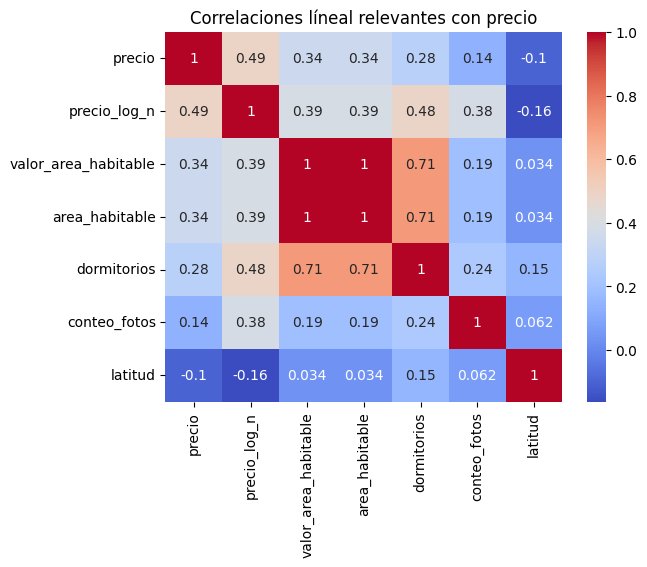

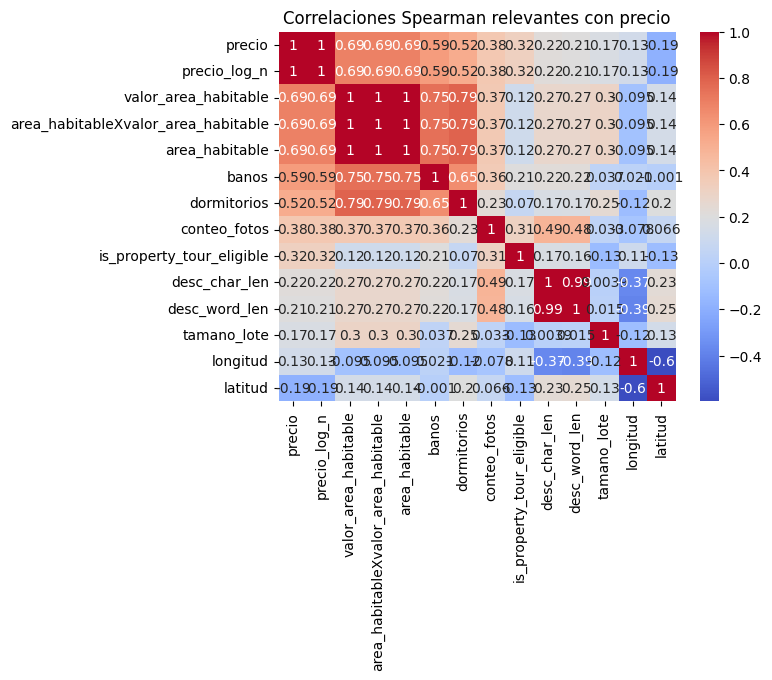

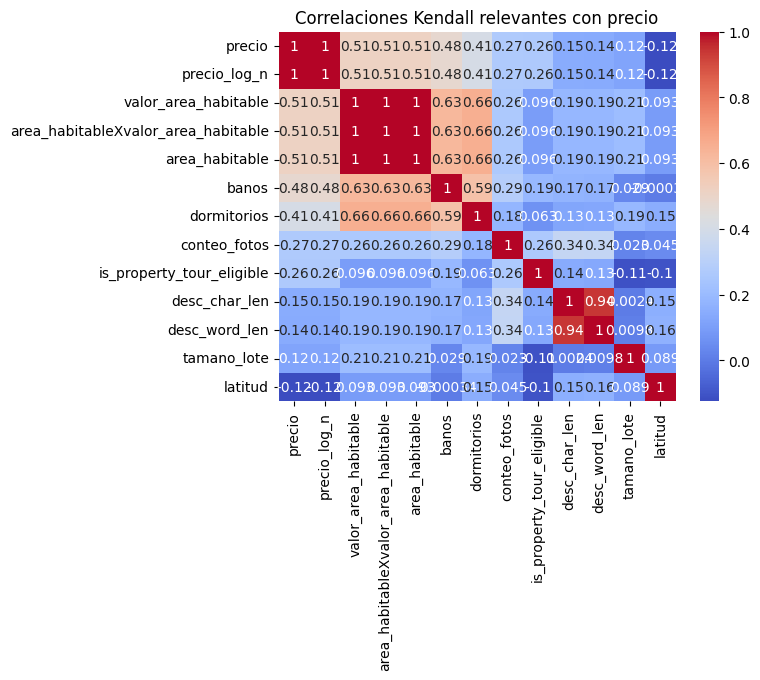

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train_clean.select_dtypes(include='number').corr()
target_corr = corr['precio'].sort_values(ascending=False)
vars_interes = target_corr[abs(target_corr) > 0.1].index


sns.heatmap(corr.loc[vars_interes, vars_interes], annot=True, cmap='coolwarm')
plt.title("Correlaciones líneal relevantes con precio")
plt.show()

corr = df_train_clean.select_dtypes(include='number').corr(method='spearman')
target_corr = corr['precio'].sort_values(ascending=False)
vars_interes = target_corr[abs(target_corr) > 0.1].index


sns.heatmap(corr.loc[vars_interes, vars_interes], annot=True, cmap='coolwarm')
plt.title("Correlaciones Spearman relevantes con precio")
plt.show()


corr = df_train_clean.select_dtypes(include='number').corr(method='kendall')
target_corr = corr['precio'].sort_values(ascending=False)
vars_interes = target_corr[abs(target_corr) > 0.1].index


sns.heatmap(corr.loc[vars_interes, vars_interes], annot=True, cmap='coolwarm')
plt.title("Correlaciones Kendall relevantes con precio")
plt.show()



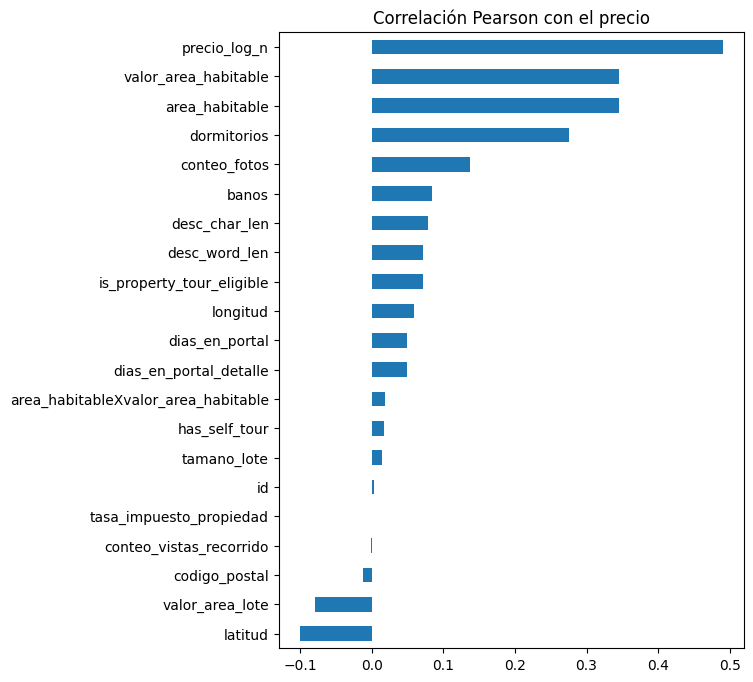

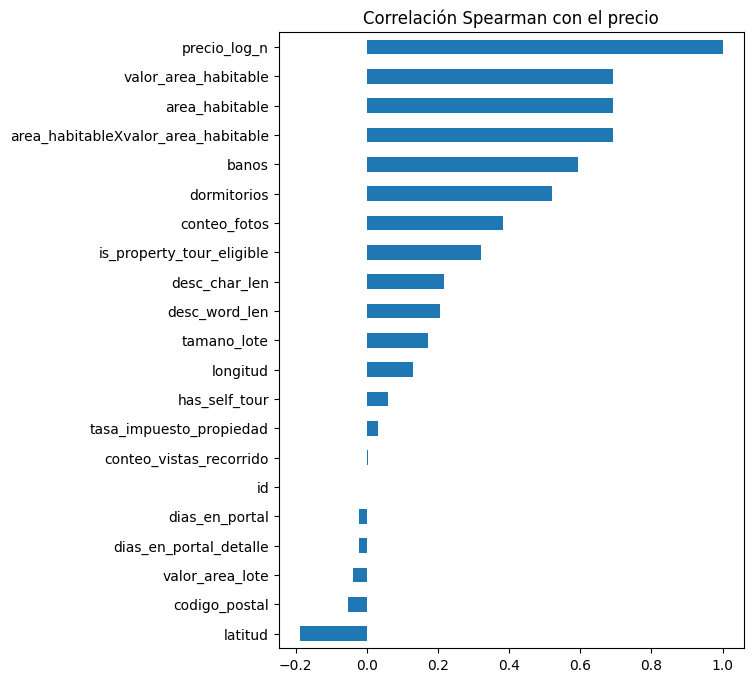

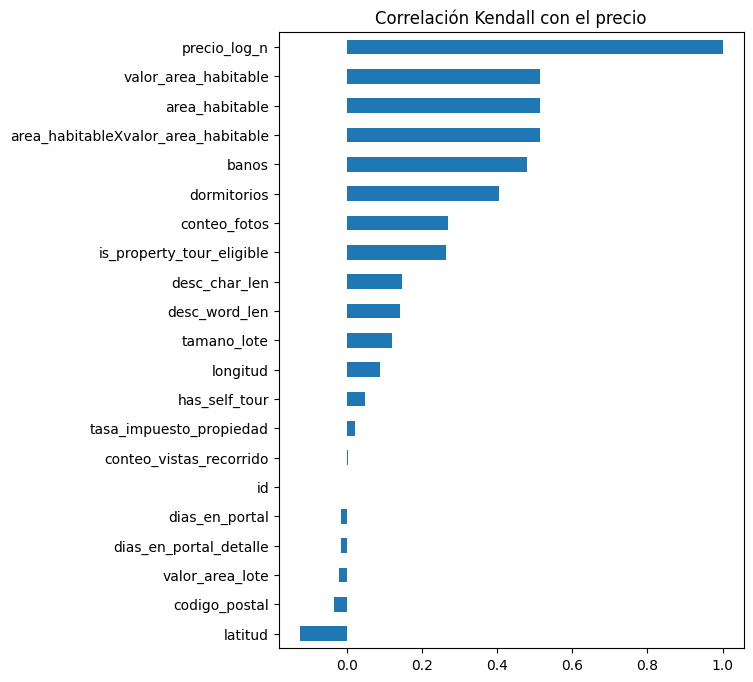

In [128]:
import matplotlib.pyplot as plt

# ===== PEARSON =====
corr = df_train_clean.select_dtypes(include='number').corr(method='pearson')
target_corr = corr['precio'].drop('precio').sort_values()

plt.figure(figsize=(6,8))
target_corr.plot(kind='barh')
plt.title("Correlación Pearson con el precio")
plt.show()

# ===== SPEARMAN =====
corr = df_train_clean.select_dtypes(include='number').corr(method='spearman')
target_corr = corr['precio'].drop('precio').sort_values()

plt.figure(figsize=(6,8))   
target_corr.plot(kind='barh')
plt.title("Correlación Spearman con el precio")
plt.show()

# ===== KENDALL =====
corr = df_train_clean.select_dtypes(include='number').corr(method='kendall')
target_corr = corr['precio'].drop('precio').sort_values()

plt.figure(figsize=(6,8))
target_corr.plot(kind='barh')
plt.title("Correlación Kendall con el precio")
plt.show()


In [129]:
# df_train_clean.info()

In [131]:
cat_col = ['tipo_vivienda']  # columna(s) categórica(s)

df_train_ohe = pd.get_dummies(
    df_train_clean,
    columns=cat_col,
    drop_first=True  # opcional: evita multicolinealidad
)

df_train_ohe.head()


cat_col = ['tipo_vivienda']  # columna(s) categórica(s)

df_test_ohe = pd.get_dummies(
    df_test,
    columns=cat_col,
    drop_first=True  # opcional: evita multicolinealidad
)

len(df_test_ohe)


39867

In [132]:
corr = df_train_ohe.select_dtypes(include=['number']).corr()['precio'].sort_values(ascending=False)
corr.head(50)


precio                                 1.000000
precio_log_n                           0.490145
valor_area_habitable                   0.344721
area_habitable                         0.344699
dormitorios                            0.275026
conteo_fotos                           0.137739
banos                                  0.084550
desc_char_len                          0.078928
desc_word_len                          0.071845
is_property_tour_eligible              0.071776
longitud                               0.059541
dias_en_portal                         0.049007
dias_en_portal_detalle                 0.048996
area_habitableXvalor_area_habitable    0.018677
has_self_tour                          0.016548
tamano_lote                            0.013575
id                                     0.002548
tasa_impuesto_propiedad                0.000310
conteo_vistas_recorrido               -0.000571
codigo_postal                         -0.012251
valor_area_lote                       -0

In [133]:
top_n = 30  # las 30 ciudades más frecuentes
ciudades_top = df_train_clean['ciudad'].value_counts().index[:top_n]

df_train_clean['ciudad_grouped'] = df_train_clean['ciudad'].apply(
    lambda x: x if x in ciudades_top else 'OTRAS'
)

df_train_ohe = pd.get_dummies(df_train_clean, columns=['tipo_vivienda', 'ciudad_grouped'], drop_first=True)

# df_train_ohe.info()

top_n = 30  # las 30 ciudades más frecuentes
ciudades_top = df_test['ciudad'].value_counts().index[:top_n]

df_test['ciudad_grouped'] = df_test['ciudad'].apply(
    lambda x: x if x in ciudades_top else 'OTRAS'
)

df_test_ohe = pd.get_dummies(df_test, columns=['tipo_vivienda', 'ciudad_grouped'], drop_first=True)

# df_train_ohe.info()

/tmp/ipykernel_21889/3588048394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['ciudad_grouped'] = df_train_clean['ciudad'].apply(


In [134]:
# Convert bool columns to int
df_train_ohe['es_constructor_premier'] = df_train_ohe['es_constructor_premier'].astype(int)
df_train_ohe['url_tour_virtual_tercero_aprobado'] = df_train_ohe['url_tour_virtual_tercero_aprobado'].fillna(0).astype(int)
df_train_ohe['es_mostrado'] = df_train_ohe['es_mostrado'].fillna(0).astype(int)

# Convert bool columns to int
df_test_ohe['es_constructor_premier'] = df_test_ohe['es_constructor_premier'].astype(int)
df_test_ohe['url_tour_virtual_tercero_aprobado'] = df_test_ohe['url_tour_virtual_tercero_aprobado'].fillna(0).astype(int)
df_test_ohe['es_mostrado'] = df_test_ohe['es_mostrado'].fillna(0).astype(int)
len(df_test_ohe)


39867

In [135]:
df_train_ohe.drop(columns=['ciudad'], inplace=True)
df_train_ohe.drop(columns=['unidades_area_lote', 'resumen'], inplace=True)

df_test_ohe.drop(columns=['ciudad'], inplace=True)
df_test_ohe.drop(columns=['unidades_area_lote', 'resumen'], inplace=True)

In [136]:
df_train_ohe['dimension_tipo_hdp'].value_counts()
df_train_ohe['es_constructor_premier'].value_counts()
df_train_ohe['url_tour_virtual_tercero_aprobado'].value_counts()
# df_train_ohe['zona_horaria'].value_counts()
# df_train_ohe['dimension_tipo_publicacion'].value_counts()
df_train_ohe['es_mostrado'].value_counts()
# df_train_ohe['movilidad'].value_counts()
# df_train_ohe['property_subtype'].value_counts()



es_mostrado
0    106624
1      3026
Name: count, dtype: int64

In [137]:
# df_train_ohe['dimension_tipo_hdp'].value_counts()
df_train_ohe.drop(columns=['dimension_tipo_hdp', "zona_horaria", "dimension_tipo_publicacion", "movilidad", "property_subtype","id"], inplace=True)
df_test_ohe.drop(columns=['dimension_tipo_hdp', "zona_horaria", "dimension_tipo_publicacion", "movilidad", "property_subtype"], inplace=True)

KeyError: "['property_subtype'] not found in axis"

In [ ]:
df_train_ohe.select_dtypes(include=['object']).info()


In [138]:
corr = df_train_ohe.corr()['precio'].sort_values(ascending=False)
corr
print(corr)

ValueError: could not convert string to float: 'Close enough to the action, yet far enough away to really feel like home, Sundance Village is a well-maintained, professionally managed manufactured home community. Right now, Sundance Village is offering a classic 2023 model year, 1120 sq. ft., 3 bed/2 bath home for only $1,895.00 per month, including site fees! Contact our representatives to schedule a viewing of this amazing retro home and learn about our promotional incentives!'

In [139]:
# Clean outliers in latitud and longitud
df_train_ohe = df_train_ohe[(df_train_ohe['latitud'] >= 24) & (df_train_ohe['latitud'] <= 32)]
df_train_ohe = df_train_ohe[(df_train_ohe['longitud'] >= -88) & (df_train_ohe['longitud'] <= -79)]

# Clean outliers in latitud and longitud
# df_test_ohe = df_test_ohe[(df_test_ohe['latitud'] >= 24) & (df_test_ohe['latitud'] <= 32)]
# df_test_ohe = df_test_ohe[(df_test_ohe['longitud'] >= -88) & (df_test_ohe['longitud'] <= -79)]


In [140]:
df_train_ohe['precio_log'] = np.log1p(df_train_ohe['precio'])
# df_train_ohe['precio_m2'] = df_train_ohe['precio'] / df_train_ohe['area_habitable']
from sklearn.cluster import KMeans
df_train_ohe['zone'] = KMeans(n_clusters=12, random_state=42).fit_predict(df_train_ohe[['latitud','longitud']])
df_train_ohe['lat_lon'] = df_train_ohe['latitud'] * df_train_ohe['longitud']
df_train_ohe['lat2'] = df_train_ohe['latitud'] ** 2
df_train_ohe['lon2'] = df_train_ohe['longitud'] ** 2

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(df_train_ohe[['latitud','longitud']])

# Guardar el modelo si quieres
import joblib
joblib.dump(kmeans, "kmeans_zones.pkl")


df_test_ohe['lat_lon'] = df_test_ohe['latitud'] * df_test_ohe['longitud']
df_test_ohe['lat2'] = df_test_ohe['latitud'] ** 2
df_test_ohe['lon2'] = df_test_ohe['longitud'] ** 2

In [141]:
# Imputar lat/lon faltantes antes del predict
df_test_ohe[['latitud','longitud']] = df_test_ohe[['latitud','longitud']].fillna(df_train_ohe[['latitud','longitud']].median())

df_test_ohe['zone'] = kmeans.predict(df_test_ohe[['latitud','longitud']])

In [142]:
df_train_ohe['edad_vivienda'] = 2025 - df_train_ohe['year_built']
df_train_ohe['banos_por_dormitorio'] = np.where(
    df_train_ohe['dormitorios'] == 0,
    0,
    df_train_ohe['banos'] / df_train_ohe['dormitorios']
)

df_test_ohe['edad_vivienda'] = 2025 - df_test_ohe['year_built']
df_test_ohe['banos_por_dormitorio'] = np.where(
    df_test_ohe['dormitorios'] == 0,
    0,
    df_test_ohe['banos'] / df_test_ohe['dormitorios']
)


KeyError: 'year_built'

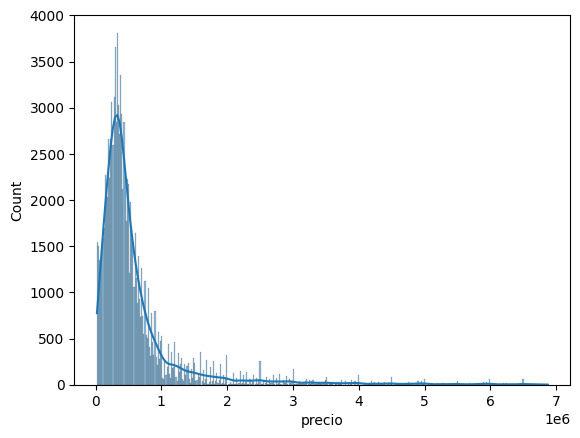

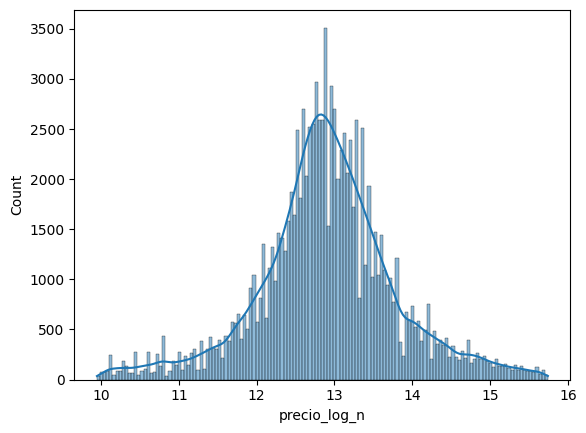

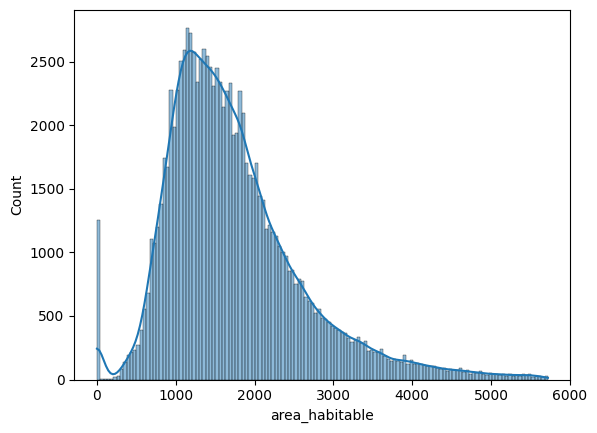

In [143]:
df_train_ohe['precio_log_n'] = np.log1p(df_train_ohe['precio'])
p1 = df_train_ohe['precio'].quantile(0.01)
p99 = df_train_ohe['precio'].quantile(0.99)

df_train_filtered = df_train_ohe[(df_train_ohe['precio'] >= p1) & (df_train_ohe['precio'] <= p99)]
sns.histplot(df_train_filtered['precio'], kde=True)
plt.show()

p1_log = df_train_ohe['precio_log_n'].quantile(0.01)
p99_log = df_train_ohe['precio_log_n'].quantile(0.99)

df_train_filtered_log = df_train_ohe[(df_train_ohe['precio_log_n'] >= p1_log) & (df_train_ohe['precio_log_n'] <= p99_log)]
sns.histplot(df_train_filtered_log['precio_log_n'], kde=True)
plt.show()

p1_area = df_train_ohe['area_habitable'].quantile(0.01)
p99_area = df_train_ohe['area_habitable'].quantile(0.99)

df_train_filtered_area = df_train_ohe[(df_train_ohe['area_habitable'] >= p1_area) & (df_train_ohe['area_habitable'] <= p99_area)]
sns.histplot(df_train_filtered_area['area_habitable'], kde=True)
plt.show()


In [144]:
df_train_filtered['area_habitable_log'] = np.log1p(df_train_filtered['area_habitable'])
df_test_ohe['area_habitable_log'] = np.log1p(df_test_ohe['area_habitable'])

/tmp/ipykernel_21889/1829187581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['area_habitable_log'] = np.log1p(df_train_filtered['area_habitable'])


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Nos quedamos solo con columnas numéricas
df_model = df_train_filtered.select_dtypes(include='number')

# Quitamos filas donde falte el target
df_model = df_model.dropna(subset=['precio_log'])

X = df_model.drop(columns=['precio_log','precio', 'precio_log_n'])
y = df_model['precio_log']

X.shape, y.shape


((107117, 28), (107117,))

In [146]:
X

,id,dormitorios,banos,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,es_constructor_premier,conteo_vistas_recorrido,url_tour_virtual_tercero_aprobado,dias_en_portal,es_mostrado,dias_en_portal_detalle,desc_char_len,desc_word_len,is_property_tour_eligible,has_self_tour,area_habitableXvalor_area_habitable,zone,lat_lon,lat2,lon2,area_habitable_log
0,1,3.0,2.0,33810,-81.976610,28.146996,0.0,NaN,NaN,0.0,1.54,8,0,0.0,0,362.0,0,362.0,435,72,0.0,0.0,0.0,0,-2307.395314,792.253384,6720.164587,0.000000
1,2,3.0,2.0,33067,-80.246210,26.287040,1166.0,NaN,NaN,1166.0,1.98,36,0,0.0,0,45.0,0,45.0,799,121,1.0,0.0,1359556.0,2,-2109.435332,691.008472,6439.454219,7.062192
2,3,3.0,3.0,32205,-81.712930,30.296097,2157.0,11761.0,0.2700,2157.0,1.79,57,0,0.0,0,48.0,0,48.0,983,149,0.0,0.0,4652649.0,4,-2475.582853,917.853493,6677.002929,7.676937
3,4,3.0,2.0,32571,-87.218590,30.668945,1979.0,7100.0,7100.2800,1979.0,1.31,52,0,0.0,0,30.0,0,30.0,1627,255,1.0,0.0,3916441.0,1,-2674.902140,940.584187,7607.082442,7.590852
4,5,3.0,3.0,32081,-81.415270,30.103437,2201.0,NaN,NaN,2201.0,1.27,1,1,0.0,0,0.0,0,0.0,56,9,0.0,1.0,4844401.0,4,-2450.879451,906.216919,6628.446189,7.697121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,109996,NaN,0.0,33844,-81.611725,28.149460,NaN,159656.0,3.6652,NaN,1.54,16,0,0.0,0,185.0,0,185.0,1127,188,0.0,0.0,NaN,0,-2297.325988,792.392098,6660.473657,NaN
109996,109997,3.0,1.0,32177,-81.707504,29.633947,1360.0,23958.0,0.5500,1360.0,1.71,38,0,0.0,0,264.0,0,264.0,478,84,1.0,0.0,1849600.0,4,-2421.315843,878.170815,6676.116210,7.215975
109997,109998,3.0,3.0,34747,-81.639640,28.344927,1361.0,871.0,871.0000,1361.0,1.49,27,0,0.0,0,161.0,0,161.0,534,85,1.0,0.0,1852321.0,0,-2314.069636,803.434887,6665.030819,7.216709
109998,109999,3.0,3.0,32405,-85.686110,30.206148,2399.0,6969.0,6969.6000,2399.0,1.27,60,0,0.0,0,66.0,0,66.0,955,173,1.0,0.0,5755201.0,1,-2588.247320,912.411377,7342.109447,7.783224


# Entrenamiento modelo LightGBM

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [148]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model_lightgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_lightgbm.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='rmse'
)

# Predicciones
y_pred = model_lightgbm.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4608
[LightGBM] [Info] Number of data points in the train set: 85693, number of used features: 28
[LightGBM] [Info] Start training from score 12.898739
RMSE: 0.12
R²:   0.8524


In [149]:
ids = df_test_ohe['id'].copy()

X_test = df_test_ohe.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = model_lightgbm.predict(X_test)
y_test_pred_real = np.expm1(y_test_pred)
submission = pd.DataFrame({
    'id': ids,
    'precio': y_test_pred_real
})
submission.to_csv("submission_lightgbm.csv", index=False)
len(submission)

39867

In [150]:
X_test

,id,dormitorios,banos,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,es_constructor_premier,conteo_vistas_recorrido,url_tour_virtual_tercero_aprobado,dias_en_portal,es_mostrado,dias_en_portal_detalle,desc_char_len,desc_word_len,is_property_tour_eligible,has_self_tour,area_habitableXvalor_area_habitable,zone,lat_lon,lat2,lon2,area_habitable_log
0,110001,4.0,4.0,32081,-81.412420,30.071754,2928.0,10018.0,10018.80,2928.0,1.27,46,0,0.0,0,176.0,0,176.0,0,0,1.0,0.0,0,4,-2448.214267,904.310389,6627.982130,7.982416
1,110002,3.0,2.0,32137,-81.247060,29.569304,1657.0,13503.0,0.31,1657.0,1.73,21,0,0.0,0,136.0,0,136.0,0,0,1.0,0.0,0,6,-2402.419016,874.343739,6601.084759,7.413367
2,110003,2.0,2.0,33917,-81.862410,26.680037,1128.0,4094.0,4094.64,1128.0,1.40,38,0,0.0,0,348.0,0,348.0,0,0,0.0,0.0,0,10,-2184.092128,711.824374,6701.454171,7.029088
3,110004,1.0,2.0,32459,-86.223145,30.347437,738.0,NaN,NaN,738.0,0.93,31,0,0.0,0,414.0,0,414.0,0,0,1.0,0.0,0,1,-2616.651461,920.966932,7434.430734,6.605298
4,110005,2.0,2.0,34748,-81.875710,28.752554,1144.0,NaN,NaN,1144.0,1.58,25,0,0.0,0,43.0,0,43.0,0,0,0.0,0.0,0,7,-2354.135773,826.709362,6703.631888,7.043160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39862,149863,2.0,2.0,34110,-81.813730,26.292768,1374.0,0.0,0.00,1374.0,0.97,25,0,0.0,0,203.0,0,203.0,0,0,1.0,0.0,0,10,-2151.109422,691.309649,6693.486417,7.226209
39863,149864,1.0,2.0,33019,-80.117510,26.007507,1040.0,NaN,NaN,1040.0,1.98,21,0,0.0,0,118.0,0,118.0,0,0,1.0,0.0,0,11,-2083.656702,676.390420,6418.815409,6.947937
39864,149865,1.0,2.0,33162,-80.181915,25.929663,722.0,NaN,NaN,722.0,1.84,4,0,0.0,0,5.0,0,5.0,0,0,1.0,0.0,0,11,-2079.090035,672.347423,6429.139493,6.583409
39865,149866,3.0,2.0,33710,-82.710810,27.795588,1224.0,8080.0,8080.00,1224.0,1.81,43,0,0.0,0,38.0,0,38.0,0,0,1.0,0.0,0,5,-2298.995598,772.594712,6841.078091,7.110696


In [151]:
importances = pd.Series(
    model_lightgbm.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Ver las 30 más importantes
print(importances.head(30))


latitud                                2964
longitud                               2638
area_habitable                         2528
tamano_lote                            2433
lon2                                   2384
codigo_postal                          2349
lat_lon                                2281
conteo_fotos                           1347
valor_area_lote                        1135
desc_char_len                          1108
tasa_impuesto_propiedad                1060
dias_en_portal                         1048
desc_word_len                           975
banos                                   975
id                                      843
dormitorios                             796
valor_area_habitable                    700
lat2                                    660
is_property_tour_eligible               537
dias_en_portal_detalle                  453
zone                                    385
area_habitableXvalor_area_habitable     205
es_constructor_premier          

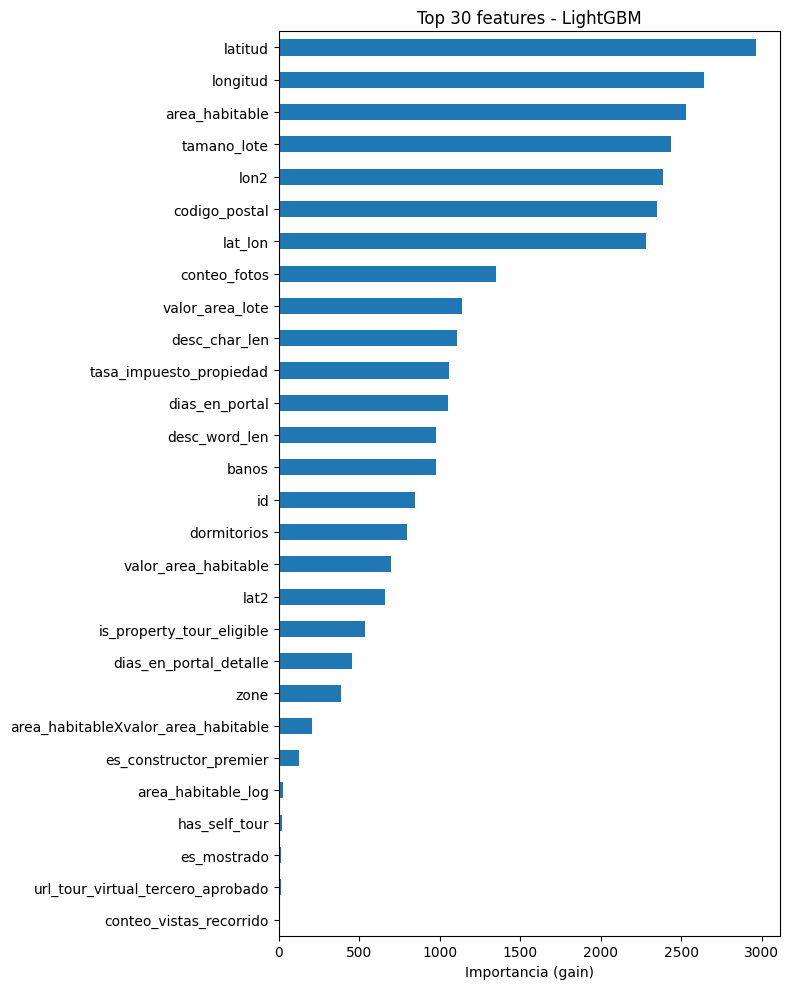

In [152]:
import matplotlib.pyplot as plt

top_n = 30
top_features = importances.head(top_n)

plt.figure(figsize=(8, 10))
top_features[::-1].plot(kind='barh')  # invertimos para que la más importante quede arriba
plt.xlabel("Importancia (gain)")
plt.title(f"Top {top_n} features - LightGBM")
plt.tight_layout()
plt.show()


In [153]:
df_train_ohe['precio'].dtype
# print(df_train_ohe['precio'].describe())


dtype('float64')

In [154]:
df_train_ohe['zone'].value_counts()

zone
11    15870
2     13789
5     13080
0     12052
10    11488
3      8308
9      7377
4      6830
7      6578
1      6534
6      5429
8      1969
Name: count, dtype: int64

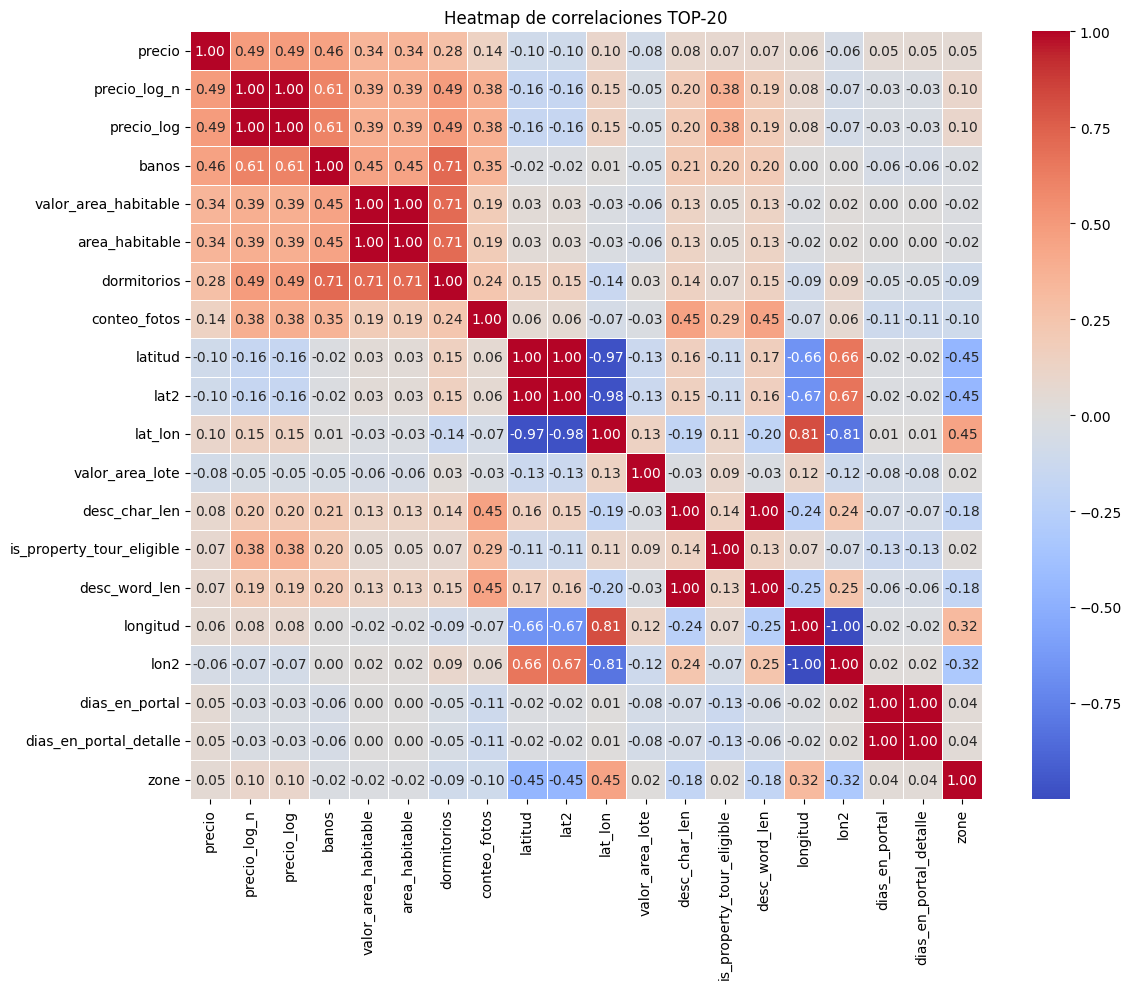

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Número de features a mostrar
TOP_N = 20  

# Calculamos correlaciones numéricas
corr = df_train_ohe.select_dtypes(include='number').corr()

# Seleccionamos las top-N correladas con precio
top_features = corr['precio'].abs().sort_values(ascending=False).head(TOP_N).index
corr_top = corr.loc[top_features, top_features]

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_top, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f"Heatmap de correlaciones TOP-{TOP_N}")
plt.tight_layout()
plt.show()


In [156]:
pip install folium


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached xyzservices-2025.11.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)
Using cached xyzservices-2025.11.0-py3-none-any.whl (93 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [157]:
print(df_train_ohe.describe())

                  id    dormitorios          banos        precio  codigo_postal       longitud  \
count  109304.000000  102287.000000  105549.000000  1.093040e+05  109304.000000  109304.000000   
mean    55016.210450       2.938174       2.397059  7.471687e+05   33438.518490     -81.699598   
std     31754.339534       1.255047       1.268430  2.194746e+06     785.009203       1.556852   
min         1.000000       0.000000       0.000000  1.000000e+00   32003.000000     -87.517130   
25%     27515.750000       2.000000       2.000000  2.499000e+05   32909.000000     -82.336120   
50%     55022.500000       3.000000       2.000000  3.990000e+05   33428.000000     -81.614393   
75%     82515.250000       4.000000       3.000000  6.500000e+05   33974.000000     -80.334655   
max    110000.000000      91.000000      91.000000  2.850000e+08   35459.000000     -80.032240   

             latitud  area_habitable   tamano_lote  valor_area_lote  valor_area_habitable  \
count  109304.000000   1

In [158]:
df_train_ohe['area_habitable'] = df_train_ohe['area_habitable'].replace(0, 0.1)
df_train_ohe['tamano_lote']    = df_train_ohe['tamano_lote'].replace(0, 0.1)
df_train_ohe = df_train_ohe.fillna(df_train_ohe.median())


TypeError: Cannot convert [['Close enough to the action, yet far enough away to really feel like home, Sundance Village is a well-maintained, professionally managed manufactured home community. Right now, Sundance Village is offering a classic 2023 model year, 1120 sq. ft., 3 bed/2 bath home for only $1,895.00 per month, including site fees! Contact our representatives to schedule a viewing of this amazing retro home and learn about our promotional incentives!'
  "Welcome to Edgewater, a highly sought-after all-ages gated community! ABLE TO RENT IMMEDIATELY! The perfect blend of comfort, and convenience! This freshly painted/well maintained 3bed 2bath lakeview condo features a spacious split floor plan, good size kitchen with breakfast nook, stainless steel appliances, and in-unit washer/dryer. The oversized primary suite boasts a large walk-in closet for max storage. Enjoy resort-style amenities including 2 pools, hot tubs, tennis courts, bi-level fitness center, business center, billiard room, clubhouse, BBQ areas, playground, and dog park! Perfectly located near top-rated schools, shopping, restaurants, places of worship, family fun, and major highways including the Turnpike and Sawgrass Expressway. This is the lifestyle you've been waiting for!"
  "Welcome to 3854 Walsh Street a rare find in the heart of Avondale offering versatility, charm, and income potential. This unique property features a spacious main home complete with a private pool and a fully renovated 1-bedroom, 1-bath garage apartment perfect for short-term rental income, a guest suite, or multigenerational living.The main residence boasts inviting living spaces, a functional kitchen, and comfortable bedrooms, all centered around your own backyard oasis. Relax and entertain by the sparkling pool or host unforgettable gatherings in your private retreat.\r\nThe renovated garage apartment offers modern finishes, a full kitchen, and a cozy living area ready to generate Airbnb income or provide independent living for family or guests.\r\n\r\nLocated in a desirable neighborhood close to dining, shopping, and Jacksonville's best attractions, this property delivers the perfect blend of lifestyle and investment opportunity. Whether you're seeking an income-producin"
  ...
  'Welcome to this brand-new, never rented, delightful 3-bedroom townhouse that combines comfort and simplicity in a charming, low-maintenance package. Perfect for families, young professionals, or anyone seeking a cozy retreat, this home offers a warm, inviting atmosphere with modern updates and plenty of character. It has a great location at The Hub Westside Reserve community, a few minutes away from Disney World, restaurants, malls, and easy access to main highways.     Come see for yourself how this gem could be your next home!'
  "Don't miss out on truly one of the best Lots in SweetBay! This corner lot home is designed for outdoor living with a wrap-around front porch facing a beautiful, shaded green space and just seconds away from 1 of 2 pools in SweetBay. It features 3 bedrooms, 2.5 baths, a loft perfect for an office or flex space, and an open living space perfect for family and entertaining. French doors take you out to the lanai with a gas hookup for your grill, overlooking a large fenced-in backyard. The kitchen has upgraded appliances, an oversized island, and soft close cabinets with plenty of storage. The master suite has a tray ceiling, walk-in-shower, separate vanities, a custom walk-in-closet. You won't be short of storage with an under-stairs closet and a 3 car garage. Situated on North Bay, SweetBay has nature trails, parks, ponds, 2 resort-style pools, 2 playgrounds, a basketball court, a Town Center with Publix, shops and dining, and a future marina."
  "Upgraded 5-Bedroom + Den Home in Gated Community – 3252 Toscana Dr, St. Cloud, FL 34772    Step into luxury and comfort at this beautifully upgraded home in the desirable gated community of Toscana. Featuring 5 spacious bedrooms, a versatile den, and 2.5 baths, this 2,805 sq ft home offers space, style, and functionality for modern living.    Inside, you'll find custom closets in every bedroom, including dual closets in the master suite for added convenience. Even the laundry room includes a built-in closet for extra storage. The open-concept floor plan is bright and inviting, complemented by electric curtains on the ground floor—fully integrated with Alexa for smart living.    The kitchen is a chef’s delight, and the home comes with a whole-house water purification system, plus an additional alkaline water filter in the kitchen for premium hydration.    Outside, the backyard is your private retreat with low-maintenance artificial turf and elegant stone-like landscaping. The garage has been upgraded with sleek 3D epoxy flooring and its own air conditioning unit, making it a perfect space for a gym, workshop, or additional living space.    Additional highlights include:    Den/office space for remote work or playroom    Custom-built front parking pad for extra vehicles    Curbed landscaping in the front yard for polished curb appeal    This home truly checks every box—space, style, smart upgrades, and a secure location just minutes from schools, shopping, and major highways."]
 ['Manufactured' 'Condo' 'Single Family' ... 'Townhouse' 'Single Family'
  'Single Family']
 ['ForSale' 'ForSale' 'ForSale' ... 'ForSale' 'ForSale' 'ForSale']
 ['America/New_York' 'America/New_York' 'America/New_York' ...
  'America/New_York' 'America/Chicago' 'America/New_York']
 ['For Sale by Agent' 'For Sale by Agent' 'For Sale by Agent' ...
  'New Construction' 'For Sale by Agent' 'For Sale by Agent']] to numeric

In [ ]:
df_train_ohe.loc[df_train_ohe['year_built'] > 2025, 'year_built'] = np.nan
df_train_ohe['year_built'] = df_train_ohe['year_built'].fillna(df_train_ohe['year_built'].median())


In [159]:
from IPython.display import display, HTML
display(HTML("<script>Jupyter.notebook.set_autosave_interval(0)</script>"))


In [160]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

import numpy as np

# Tomamos una muestra limpia
sample = df_train_ohe[['latitud','longitud','precio']].dropna()
sample = sample.sample(5000, random_state=42)

# Convertimos lat/lon a float (algunas veces vienen como objeto/string)
sample['latitud'] = sample['latitud'].astype(float)
sample['longitud'] = sample['longitud'].astype(float)
sample['precio'] = sample['precio'].astype(float)

# Eliminamos infinitos y outliers absurdos
sample = sample[(sample['precio'] > 1000) & (sample['precio'] < 2e7)]

# Crear mapa centrado en Florida
m = folium.Map(location=[27.8, -81.5], zoom_start=7, tiles='OpenStreetMap')

# Construir datos para HeatMap: formato (lat, lon, peso)
heat_data = sample[['latitud','longitud','precio']].values.tolist()

HeatMap(
    heat_data,
    radius=12,
    blur=8,
    max_zoom=10,
    min_opacity=0.3
).add_to(m)

m.save("Florida_map.html")



array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'dormitorios'}>,
        <Axes: title={'center': 'banos'}>,
        <Axes: title={'center': 'precio'}>,
        <Axes: title={'center': 'codigo_postal'}>],
       [<Axes: title={'center': 'longitud'}>,
        <Axes: title={'center': 'latitud'}>,
        <Axes: title={'center': 'area_habitable'}>,
        <Axes: title={'center': 'tamano_lote'}>,
        <Axes: title={'center': 'valor_area_lote'}>],
       [<Axes: title={'center': 'valor_area_habitable'}>,
        <Axes: title={'center': 'tasa_impuesto_propiedad'}>,
        <Axes: title={'center': 'conteo_fotos'}>,
        <Axes: title={'center': 'es_constructor_premier'}>,
        <Axes: title={'center': 'conteo_vistas_recorrido'}>],
       [<Axes: title={'center': 'url_tour_virtual_tercero_aprobado'}>,
        <Axes: title={'center': 'dias_en_portal'}>,
        <Axes: title={'center': 'es_mostrado'}>,
        <Axes: title={'center': 'dias_en_portal_detalle'}>,
   

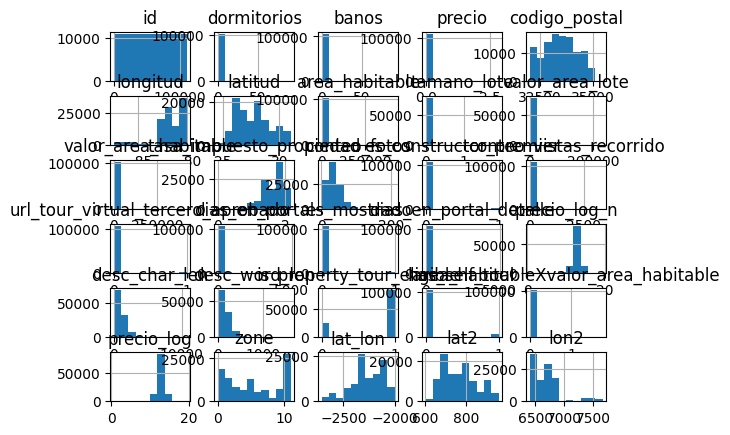

In [161]:
df_train_ohe.hist()

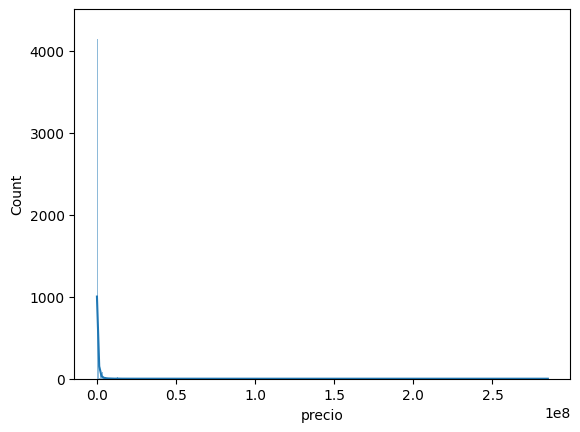

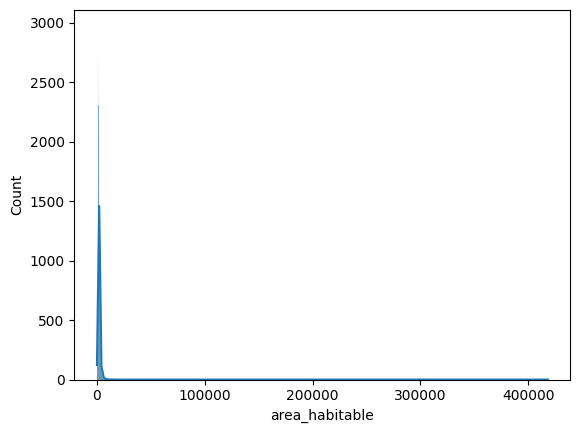

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train_ohe['precio'], kde=True)
plt.show()

sns.histplot(df_train_ohe['area_habitable'], kde=True)
plt.show()

In [163]:
import pandas as pd

numeric = df_train_clean.select_dtypes(include='number')

pearson  = numeric.corr(method='pearson')['precio']
spearman = numeric.corr(method='spearman')['precio']
kendall  = numeric.corr(method='kendall')['precio']

corr_df = pd.concat([pearson, spearman, kendall], axis=1)
corr_df.columns = ['pearson', 'spearman', 'kendall']

# Quitamos la fila target
corr_df = corr_df.drop(index='precio')

# Ordenamos por Pearson (o por la que quieras)
corr_df = corr_df.sort_values(by='pearson', ascending=False)
corr_df.head()


,pearson,spearman,kendall
precio_log_n,0.490145,1.000000,1.000000
valor_area_habitable,0.344721,0.691970,0.513096
area_habitable,0.344699,0.691968,0.513094
dormitorios,0.275026,0.520869,0.405649
conteo_fotos,0.137739,0.381674,0.269304


In [164]:
TOP_N = 15
corr_top = corr_df.head(TOP_N)
corr_top


,pearson,spearman,kendall
precio_log_n,0.490145,1.000000,1.000000
valor_area_habitable,0.344721,0.691970,0.513096
area_habitable,0.344699,0.691968,0.513094
dormitorios,0.275026,0.520869,0.405649
conteo_fotos,0.137739,0.381674,0.269304
banos,0.084550,0.593601,0.480836
desc_char_len,0.078928,0.216114,0.147457
desc_word_len,0.071845,0.206568,0.140978
is_property_tour_eligible,0.071776,0.321798,0.262978
longitud,0.059541,0.131102,0.089045


<Figure size 1000x800 with 0 Axes>

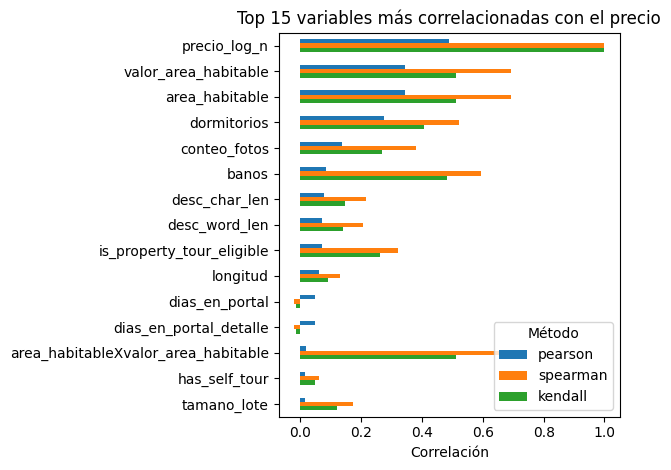

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_top.plot(kind='barh')
plt.title(f"Top {TOP_N} variables más correlacionadas con el precio")
plt.xlabel("Correlación")
plt.gca().invert_yaxis()  # Que el top quede arriba
plt.legend(title="Método", loc="lower right")
plt.tight_layout()
plt.show()


In [167]:
import plotly.express as px

fig = px.line_polar(
    corr_top,
    r='pearson',
    theta=corr_top.index,
    line_close=True,
    title='Correlación Pearson en variables TOP'
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
TOP_N = 10

numeric = df_train_clean.select_dtypes(include='number')
pearson = numeric.corr(method='pearson')['precio'].drop('precio').sort_values(ascending=False)

top_features = pearson.head(TOP_N).index.tolist()
top_features


In [168]:
import matplotlib.pyplot as plt

df_train_clean[top_features].hist(bins=50, figsize=(15, 12), layout=(5,2))
plt.suptitle("Distribución de las variables TOP correlacionadas con el precio", fontsize=16)
plt.tight_layout()
plt.show()


KeyError: "['precio_log', 'lat2', 'lat_lon', 'lon2', 'zone'] not in index"

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(data=df_train_clean[top_features])
plt.xticks(rotation=45)
plt.title("Boxplot de las variables TOP")
plt.show()


KeyError: "['precio_log', 'lat2', 'lat_lon', 'lon2', 'zone'] not in index"

<Figure size 1200x800 with 0 Axes>

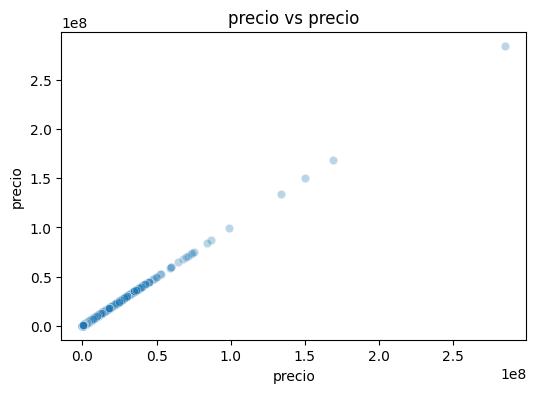

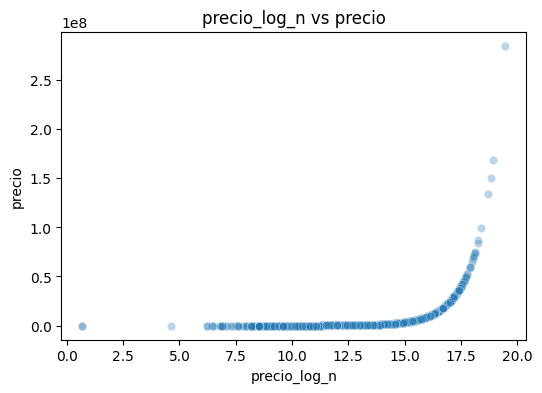

ValueError: Could not interpret value `precio_log` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [170]:
import seaborn as sns

for col in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_train_clean, x=col, y='precio', alpha=0.3)
    plt.title(f"{col} vs precio")
    plt.show()


In [ ]:
import seaborn as sns

for col in top_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_train_clean[col].dropna(), fill=True)
    plt.title(f"Densidad de {col}")
    plt.show()


# Modelo XGboost

In [173]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import xgboost as xgb


In [174]:
embeddings = np.load("text_embeddings.npy")


In [172]:
from xgboost import XGBRegressor

model_XGBoost = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # rápido
    random_state=42
)
model_XGBoost.fit(X_train, y_train)



KeyboardInterrupt: 

In [115]:

# Predicciones
y_pred = model_XGBoost.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

RMSE: 0.10
R²:   0.8800


In [116]:
ids = df_test_ohe['id'].copy()

X_test = df_test_ohe.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = model_XGBoost.predict(X_test)
y_test_pred_real = np.expm1(y_test_pred)
submission = pd.DataFrame({
    'id': ids,
    'precio': y_test_pred_real
})
submission.to_csv("submission_xgboost.csv", index=False)
len(submission)

39867

# Model CatBoostRegressor

In [117]:
from catboost import CatBoostRegressor

model_CatBoost = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=10,
    loss_function='RMSE',
    random_state=42,
    verbose=False
)
model_CatBoost.fit(X_train, y_train)


In [118]:

# Predicciones
y_pred = model_CatBoost.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

RMSE: 0.10
R²:   0.8690


In [119]:
ids = df_test_ohe['id'].copy()

X_test = df_test_ohe.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = model_CatBoost.predict(X_test)
y_test_pred_real = np.expm1(y_test_pred)
submission = pd.DataFrame({
    'id': ids,
    'precio': y_test_pred_real
})
submission.to_csv("submission_catboost.csv", index=False)
len(submission)

39867

# Creación KFolds para validación cruzada

In [175]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [178]:
X

,id,dormitorios,banos,codigo_postal,longitud,latitud,area_habitable,tamano_lote,valor_area_lote,valor_area_habitable,tasa_impuesto_propiedad,conteo_fotos,es_constructor_premier,conteo_vistas_recorrido,url_tour_virtual_tercero_aprobado,dias_en_portal,es_mostrado,dias_en_portal_detalle,desc_char_len,desc_word_len,is_property_tour_eligible,has_self_tour,area_habitableXvalor_area_habitable,zone,lat_lon,lat2,lon2,area_habitable_log
0,1,3.0,2.0,33810,-81.976610,28.146996,0.0,NaN,NaN,0.0,1.54,8,0,0.0,0,362.0,0,362.0,435,72,0.0,0.0,0.0,0,-2307.395314,792.253384,6720.164587,0.000000
1,2,3.0,2.0,33067,-80.246210,26.287040,1166.0,NaN,NaN,1166.0,1.98,36,0,0.0,0,45.0,0,45.0,799,121,1.0,0.0,1359556.0,2,-2109.435332,691.008472,6439.454219,7.062192
2,3,3.0,3.0,32205,-81.712930,30.296097,2157.0,11761.0,0.2700,2157.0,1.79,57,0,0.0,0,48.0,0,48.0,983,149,0.0,0.0,4652649.0,4,-2475.582853,917.853493,6677.002929,7.676937
3,4,3.0,2.0,32571,-87.218590,30.668945,1979.0,7100.0,7100.2800,1979.0,1.31,52,0,0.0,0,30.0,0,30.0,1627,255,1.0,0.0,3916441.0,1,-2674.902140,940.584187,7607.082442,7.590852
4,5,3.0,3.0,32081,-81.415270,30.103437,2201.0,NaN,NaN,2201.0,1.27,1,1,0.0,0,0.0,0,0.0,56,9,0.0,1.0,4844401.0,4,-2450.879451,906.216919,6628.446189,7.697121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,109996,NaN,0.0,33844,-81.611725,28.149460,NaN,159656.0,3.6652,NaN,1.54,16,0,0.0,0,185.0,0,185.0,1127,188,0.0,0.0,NaN,0,-2297.325988,792.392098,6660.473657,NaN
109996,109997,3.0,1.0,32177,-81.707504,29.633947,1360.0,23958.0,0.5500,1360.0,1.71,38,0,0.0,0,264.0,0,264.0,478,84,1.0,0.0,1849600.0,4,-2421.315843,878.170815,6676.116210,7.215975
109997,109998,3.0,3.0,34747,-81.639640,28.344927,1361.0,871.0,871.0000,1361.0,1.49,27,0,0.0,0,161.0,0,161.0,534,85,1.0,0.0,1852321.0,0,-2314.069636,803.434887,6665.030819,7.216709
109998,109999,3.0,3.0,32405,-85.686110,30.206148,2399.0,6969.0,6969.6000,2399.0,1.27,60,0,0.0,0,66.0,0,66.0,955,173,1.0,0.0,5755201.0,1,-2588.247320,912.411377,7342.109447,7.783224


In [179]:
np.isinf(X_train).sum().sum(), np.isnan(X_train).sum().sum()
cols_inf = X_train.columns[np.isinf(X_train).any()]
cols_inf


Index([], dtype='object')

In [180]:
assert embeddings.shape[0] == len(X)


AssertionError: 

In [123]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

rmse_xgboost_scores = []
r2_xgboost_scores = []
rmse_lgb_scores = []
r2_lgb_scores = []
rmse_catboost_scores = []
r2_catboost_scores = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"📁 Fold {fold + 1}")
    
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    # model = XGBRegressor(
    #     n_estimators=2000,
    #     learning_rate=0.03,
    #     max_depth=12,
    #     subsample=0.8,
    #     colsample_bytree=0.8,
    #     tree_method='hist',
    #     random_state=42
    # )
    model_xgb = XGBRegressor(
        n_estimators=3500,
        learning_rate=0.015,        # más bajo → más calidad
        max_depth=10,               # profundo pero no brutal
        min_child_weight=3,         # IMPORTANTÍSIMO: controla overfitting
        subsample=0.85,
        colsample_bytree=0.85,
        reg_alpha=0.3,              # L1 regularization
        reg_lambda=2.0,             # L2 regularization
        gamma=0.05,                 # penalización de splits triviales
        tree_method='hist',         # rápido CPU
        booster='gbtree',
        random_state=42,
        n_jobs=-1
    )

    model_xgb.fit(X_train, y_train)
    
    y_pred_xgb = model_xgb.predict(X_valid)
    
    rmse_xgboost = mean_squared_error(y_valid, y_pred_xgb)
    r2   = r2_score(y_valid, y_pred_xgb)
    
    rmse_xgboost_scores.append(rmse_xgboost)
    r2_xgboost_scores.append(r2)
    
    print(f"RMSE xgboost fold: {rmse_xgboost:.4f} | R² fold: {r2:.4f}")

    model_lgb = LGBMRegressor(
        n_estimators=3000,
        learning_rate=0.02,
        max_depth=-1,
        num_leaves=64,          # ojo: más hojas → más capacidad
        min_child_samples=40,   # controla overfitting
        subsample=0.9,
        colsample_bytree=0.85,
        reg_alpha=0.1,
        reg_lambda=5.0,
        random_state=42,
        n_jobs=-1
    )

    model_lgb.fit(X_train, y_train)
    
    y_pred_lgb = model_lgb.predict(X_valid)
    
    rmse_lgb = mean_squared_error(y_valid, y_pred_lgb)
    r2   = r2_score(y_valid, y_pred_lgb)
    
    rmse_lgb_scores.append(rmse_lgb)
    r2_lgb_scores.append(r2)
    
    print(f"RMSE lgb fold: {rmse_lgb:.4f} | R² fold: {r2:.4f}")

    model_cat = CatBoostRegressor(
        iterations=2500,
        learning_rate=0.015,
        depth=10,
        l2_leaf_reg=3.0,       # L2 particular de CatBoost
        bagging_temperature=0.5,
        random_seed=42,
        loss_function='RMSE',
        task_type='CPU',        # GPU si puedes 🎉
        verbose=False
    )

    model_cat.fit(X_train, y_train)
    
    y_pred_cat = model_cat.predict(X_valid)
    
    rmse_cat = mean_squared_error(y_valid, y_pred_cat)
    r2   = r2_score(y_valid, y_pred_cat)
    
    rmse_catboost_scores.append(rmse_cat)
    r2_catboost_scores.append(r2)
    
    print(f"RMSE cat boost fold: {rmse_cat:.4f} | R² fold: {r2:.4f}")

📁 Fold 1
RMSE xgboost fold: 0.0948 | R² fold: 0.8815
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4187
[LightGBM] [Info] Number of data points in the train set: 85693, number of used features: 44
[LightGBM] [Info] Start training from score 12.898739
RMSE lgb fold: 0.0981 | R² fold: 0.8774
RMSE cat boost fold: 0.1119 | R² fold: 0.8602
📁 Fold 2
RMSE xgboost fold: 0.0921 | R² fold: 0.8875
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4188
[LightGBM] [Info] Number of data points in the train set: 85693, number of used features: 44
[LightGBM] [Info] Start training from score 12.902014
RMSE lgb fold: 0.0961 | R² fold: 0.8826
RMSE cat boost fold: 0.1084 | R² fold: 0.8676
📁 Fold 3
RMSE xgboost fold: 0.0928 |

In [124]:
# ENSAMBLE
y_pred_ens = (
    0.55 * y_pred_xgb +
    0.30 * y_pred_lgb +
    0.15 * y_pred_cat
)

rmse_ens = mean_squared_error(y_valid, y_pred_ens)
r2_ens   = r2_score(y_valid, y_pred_ens)

print(f"RMSE ENSEMBLE FOLD: {rmse_ens:.4f} | R²: {r2_ens:.4f}")


RMSE ENSEMBLE FOLD: 0.0972 | R²: 0.8826


In [125]:
ids = df_test_ohe['id'].copy()

X_test = df_test_ohe.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = model_CatBoost.predict(X_test)
y_test_pred_real = np.expm1(y_test_pred)
submission = pd.DataFrame({
    'id': ids,
    'precio': y_test_pred_real
})
submission.to_csv("submission_catboost.csv", index=False)
len(submission)

39867

In [126]:
import numpy as np
import joblib
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===== XGBOOST =====
model_xgb = XGBRegressor(
    n_estimators=3500,
    learning_rate=0.015,
    max_depth=10,
    min_child_weight=3,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.3,
    reg_lambda=2.0,
    gamma=0.05,
    tree_method='hist',
    random_state=42,
    n_jobs=-1
)
model_xgb.fit(X_train, y_train)
joblib.dump(model_xgb, "model_xgb.pkl")
print("💾 XGBoost guardado: model_xgb.pkl")

# ===== LIGHTGBM =====
model_lgb = LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    max_depth=-1,
    num_leaves=64,
    min_child_samples=40,
    subsample=0.9,
    colsample_bytree=0.85,
    reg_alpha=0.1,
    reg_lambda=5.0,
    random_state=42,
    n_jobs=-1
)
model_lgb.fit(X_train, y_train)
joblib.dump(model_lgb, "model_lgb.pkl")
print("💾 LightGBM guardado: model_lgb.pkl")

# ===== CATBOOST =====
model_cat = CatBoostRegressor(
    iterations=2500,
    learning_rate=0.015,
    depth=10,
    l2_leaf_reg=3.0,
    bagging_temperature=0.5,
    random_seed=42,
    loss_function='RMSE',
    task_type='CPU',
    verbose=False
)
model_cat.fit(X_train, y_train)
joblib.dump(model_cat, "model_cat.pkl")
print("💾 CatBoost guardado: model_cat.pkl")


💾 XGBoost guardado: model_xgb.pkl
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4186
[LightGBM] [Info] Number of data points in the train set: 85694, number of used features: 44
[LightGBM] [Info] Start training from score 12.902791
💾 LightGBM guardado: model_lgb.pkl
💾 CatBoost guardado: model_cat.pkl


In [ ]:
def predict_ensemble(X_new, weights=(0.55, 0.30, 0.15), inverse_log=True):
    w_xgb, w_lgb, w_cat = weights

    model_xgb = joblib.load("model_xgb.pkl")
    model_lgb = joblib.load("model_lgb.pkl")
    model_cat = joblib.load("model_cat.pkl")

    pred_xgb = model_xgb.predict(X_new)
    pred_lgb = model_lgb.predict(X_new)
    pred_cat = model_cat.predict(X_new)
    print(f"Predicciones XGB: {pred_xgb[:5]}")
    print(f"Predicciones LGB: {pred_lgb[:5]}")
    print(f"Predicciones CAT: {pred_cat[:5]}")
    # blending / weighted ensemble
    pred_final = w_xgb * pred_xgb + w_lgb * pred_lgb + w_cat * pred_cat

    if inverse_log:
        pred_final = np.expm1(pred_final)  # revierte log1p

    return pred_final


In [136]:
y_valid_pred = predict_ensemble(X_valid)
rmse = mean_squared_error(y_valid, np.log1p(y_valid_pred))
r2 = r2_score(y_valid, np.log1p(y_valid_pred))
print(f"RMSE ensemble: {rmse:.4f} | R²: {r2:.4f}")


Predicciones XGB: [13.328746 12.399769 13.020847 13.28686  11.69003 ]
Predicciones LGB: [13.37986664 12.31894952 13.02054723 13.3057788  11.67777738]
Predicciones CAT: [13.26751426 12.31417223 13.0676274  13.36615453 11.62790725]
RMSE ensemble: 0.0970 | R²: 0.8829


In [134]:
ids = df_test_ohe['id'].copy()

X_test = df_test_ohe.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = predict_ensemble(X_test)

submission = pd.DataFrame({
    'id': ids,
    'precio': y_test_pred
})
submission.to_csv("submission_ensemble.csv", index=False)
len(submission)

Predicciones XGB: [13.867971 12.73951  11.724962 13.207758 11.222448]
Predicciones LGB: [13.83444659 12.66495703 11.70833974 13.15078467 11.16827747]
Predicciones CAT: [13.51380955 12.73064261 11.7011824  13.20721546 11.01067235]


39867

In [130]:
Pega infinito esta prediccion mirar por que

SyntaxError: invalid syntax (4105120062.py, line 1)